In [8]:
import numpy as np
import scipy

import tqdm

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from jupyterthemes import jtplot
jtplot.style(theme='onedork')

plt.rcParams["figure.figsize"] = [18, 13]
plt.rcParams["text.usetex"] = False

%matplotlib inline
%config Completer.use_jedi = False

print("Imports Done!")

Imports Done!


# Linear Algebra

Cat Challenge
---

Задача: сравнение предложений

Дан набор предложений, скопированных из Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов:

- кошки (животные)
- UNIX-утилита cat для вывода содержимого файлов
- версии операционной системы OS X, названные в честь семейства кошачьих

Задача — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.

Выполните следующие шаги:

1. Скачайте файл с предложениями (sentences.txt).
2. Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().
3. Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.
4. Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.
5. Создайте матрицу размера n * d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.
6. Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание. Само предложение (In comparison to dogs, cats have not undergone... ) имеет индекс 0.
7. Запишите полученные числа в ответ, разделив пробелом.
8. Совпадают ли ближайшие два предложения по тематике с первым? Совпадают ли тематики у следующих по близости предложений?

Разумеется, использованный вами метод крайне простой. Например, он не учитывает формы слов (так, cat и cats он считает разными словами, хотя по сути они означают одно и то же), не удаляет из текстов артикли и прочие ненужные слова. Позже мы будем подробно изучать анализ текстов, где выясним, как достичь высокого качества в задаче поиска похожих предложений.

In [17]:
import re


text = []

with open("sentences.txt", 'r') as f:
    for line in f:
        text.append(line.lower())

text = [re.split('[^a-z]', line) for line in text]
text = [[word for word in sentence if bool(word)] for sentence in text]
flat_text = [word for sentence in text for word in sentence]


words_index = 0
words_dict = {}
for word in flat_text:
    if word not in words_dict:
        words_dict[word] = words_index
        words_index += 1

result = np.zeros((len(text), len(words_dict)))

In [18]:
row_counter = 0

for sentence in text:
    for word in sentence:
        if word in words_dict.keys():
            result[row_counter, words_dict[word]] += 1
    row_counter += 1

print(result)

[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 1. 1. 1.]]


In [19]:
from scipy.spatial.distance import cosine

res = []

for sentence_num in range(1, result.shape[0]):
    res.append([sentence_num, cosine(result[0], result[sentence_num])])
    print(f"Number of sentence = {sentence_num}. Result = {cosine(result[0], result[sentence_num])}")

answer = sorted(res, key=lambda lst: lst[1])[:2]
answer

Number of sentence = 1. Result = 0.9527544408738466
Number of sentence = 2. Result = 0.8644738145642124
Number of sentence = 3. Result = 0.8951715163278082
Number of sentence = 4. Result = 0.7770887149698589
Number of sentence = 5. Result = 0.9402385695332803
Number of sentence = 6. Result = 0.7327387580875756
Number of sentence = 7. Result = 0.9258750683338899
Number of sentence = 8. Result = 0.8842724875284311
Number of sentence = 9. Result = 0.9055088817476932
Number of sentence = 10. Result = 0.8328165362273942
Number of sentence = 11. Result = 0.8804771390665607
Number of sentence = 12. Result = 0.8396432548525454
Number of sentence = 13. Result = 0.8703592552895671
Number of sentence = 14. Result = 0.8740118423302576
Number of sentence = 15. Result = 0.9442721787424647
Number of sentence = 16. Result = 0.8406361854220809
Number of sentence = 17. Result = 0.956644501523794
Number of sentence = 18. Result = 0.9442721787424647
Number of sentence = 19. Result = 0.8885443574849294
Num

[[6, 0.7327387580875756], [4, 0.7770887149698589]]

Function approximation Challenge
---

Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

$$
  \Large f(x) = \sin(x / 5) \cdot e^{x / 10} + 5 \cdot e^{-x / 2}
$$

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:

\begin{cases}
    \Large w_{0} + w_{1} \cdot x_{1} + w_{2} \cdot x_{1}^2 + ... + w_{n} \cdot x_{1}^n = f(x_{1})\\
    \Large ...\\
    \Large w_{0} + w_{1} \cdot x_{n+1} + w_{2} \cdot x_{n+1}^2 + ... + w_{n} \cdot x_{n+1}^n = f(x_{n+1})
\end{cases}

где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством и будем находить приближение функции многочленом, решая систему линейных уравнений.

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42).
4. Отправьте ответ, разделив числа (w_0, w_1, w_2, w_3) пробелами.

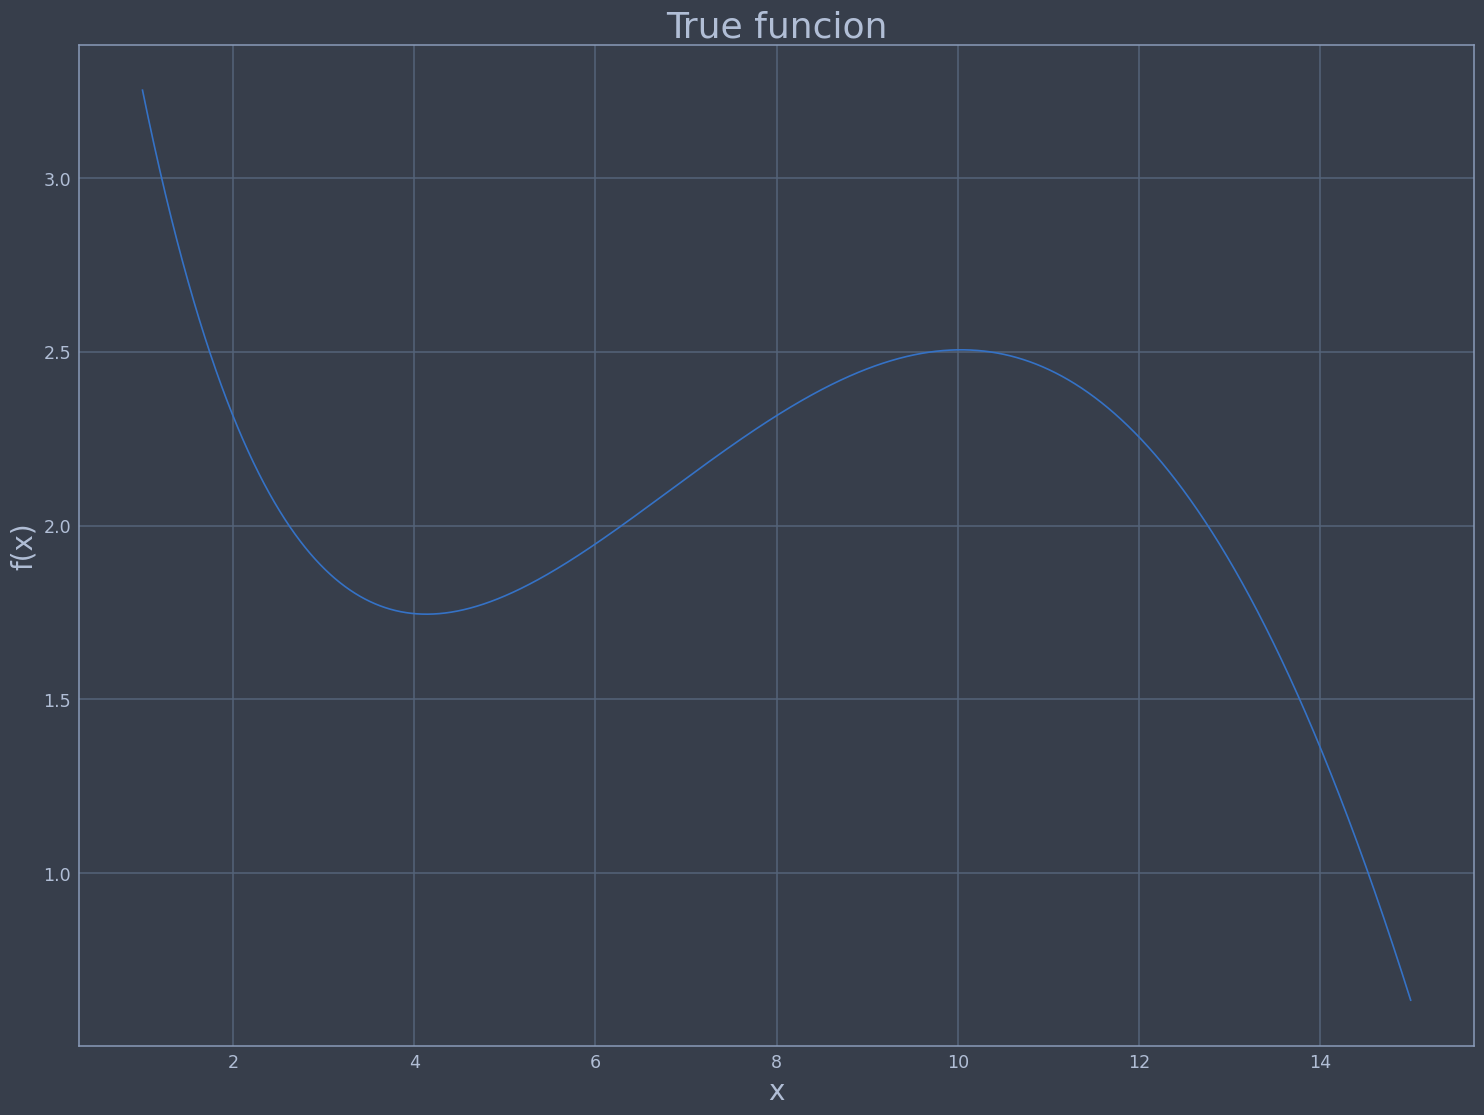

In [2]:
def true_funcion(x: float) -> float:
    """
        Initial function...
    """
    return np.sin(x/5) * np.exp(x/10) + 5 * np.exp(-x/2)

def polynomial_of_degree_one(x, coef):
    return coef[0] + coef[1]*x

def polynomial_of_degree_two(x, coef):
    return coef[0] + coef[1]*x + coef[2]*x**2

def polynomial_of_degree_three(x, coef):
    return coef[0] + coef[1]*x + coef[2]*x**2 + coef[3]*x**3

def approximating_function(x, coef):
    """
        General formula of the polynomial...
    """
    return sum([coef[n]*x**n for n in range(len(coef))])


x = np.linspace(1, 15, num=10**5)

x_values_1 = [1, 15]
x_values_2 = [1, 8, 15]
x_values_3 = [1, 4, 10, 15]

fig, ax = plt.subplots()
ax.plot(x, true_funcion(x))
ax.set_xlabel("x", size=20)
ax.set_ylabel("f(x)", size=20)
ax.set_title("True funcion", size=26);

In [3]:
[true_funcion(num) for num in x_values_1]

[3.252216865271419, 0.6352214195786656]

Result = [ 3.43914511 -0.18692825]


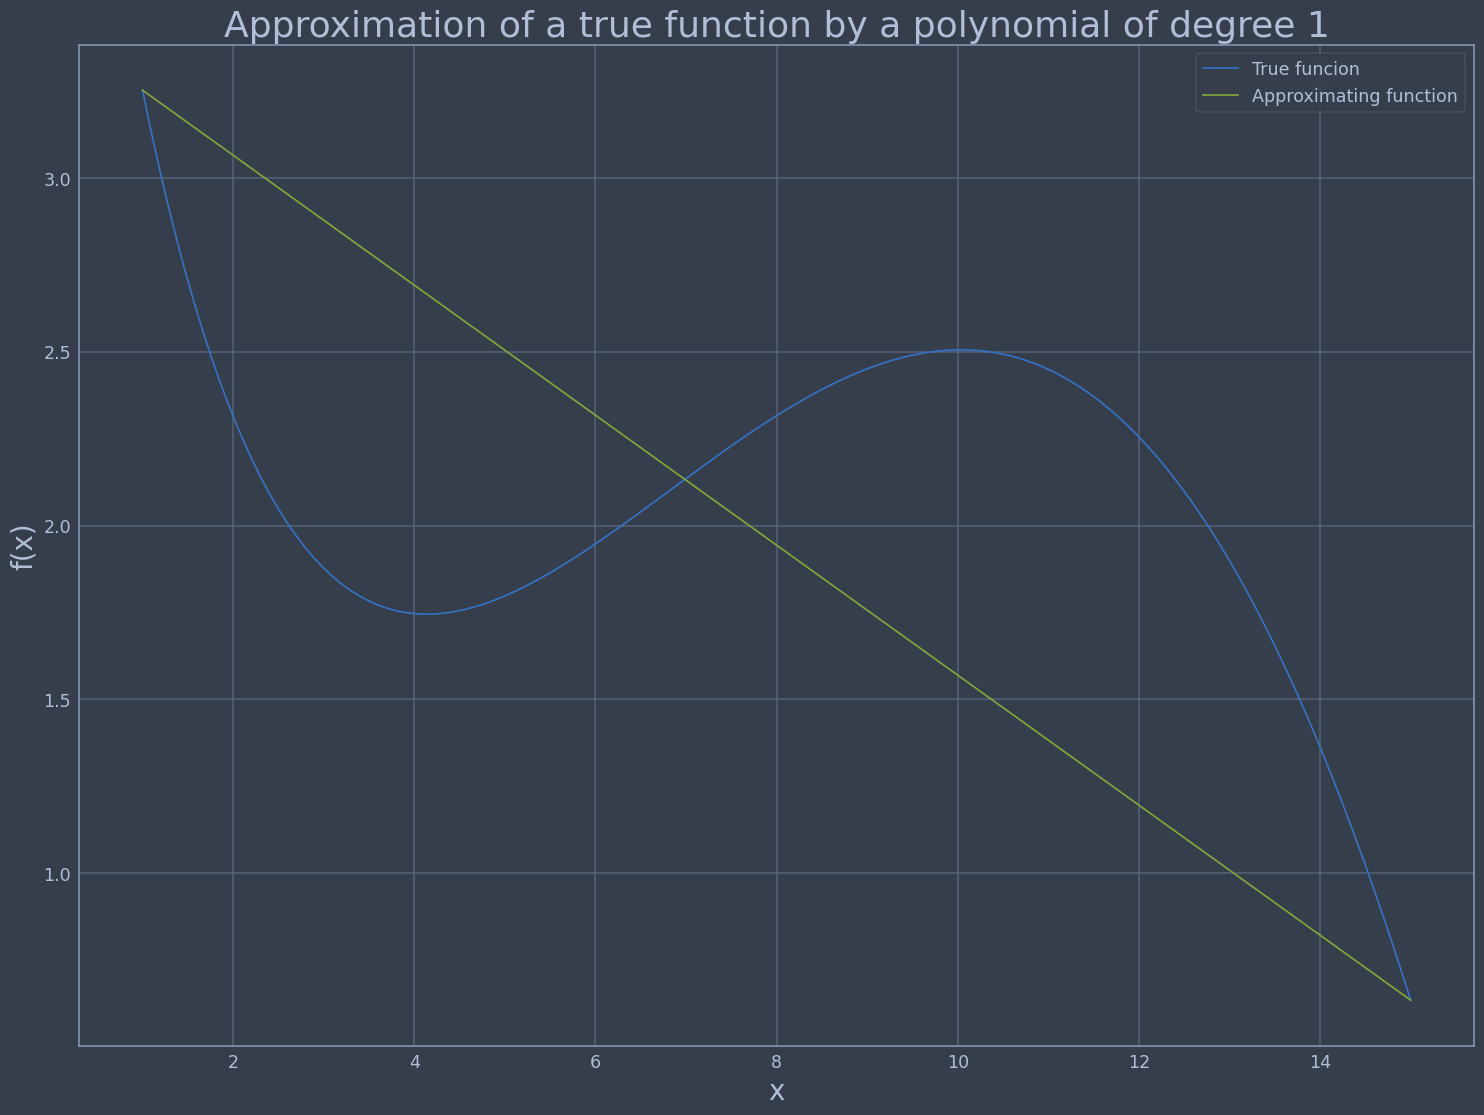

In [67]:
coordinates = [(num, true_funcion(num)) for num in x_values_1]
order = len(coordinates)

coef_matrix_deg_one = np.array([[x_val**n for n in range(order)] for x_val in x_values_1])
free_vector_deg_one = np.array([true_funcion(x_val) for x_val in x_values_1])

result_deg_one = np.linalg.solve(coef_matrix_deg_one, free_vector_deg_one)
print(f"Result = {result_deg_one}")

fig, ax = plt.subplots()
ax.plot(x, true_funcion(x), x, polynomial_of_degree_one(x, result_deg_one))

plt.legend(["True funcion", "Approximating function"])
ax.set_xlabel("x", size=20)
ax.set_ylabel("f(x)", size=20)
ax.set_title(f"Approximation of a true function by a polynomial of degree {order - 1}", size=26);

Result = [ 3.32512949 -0.06531159 -0.00760104]


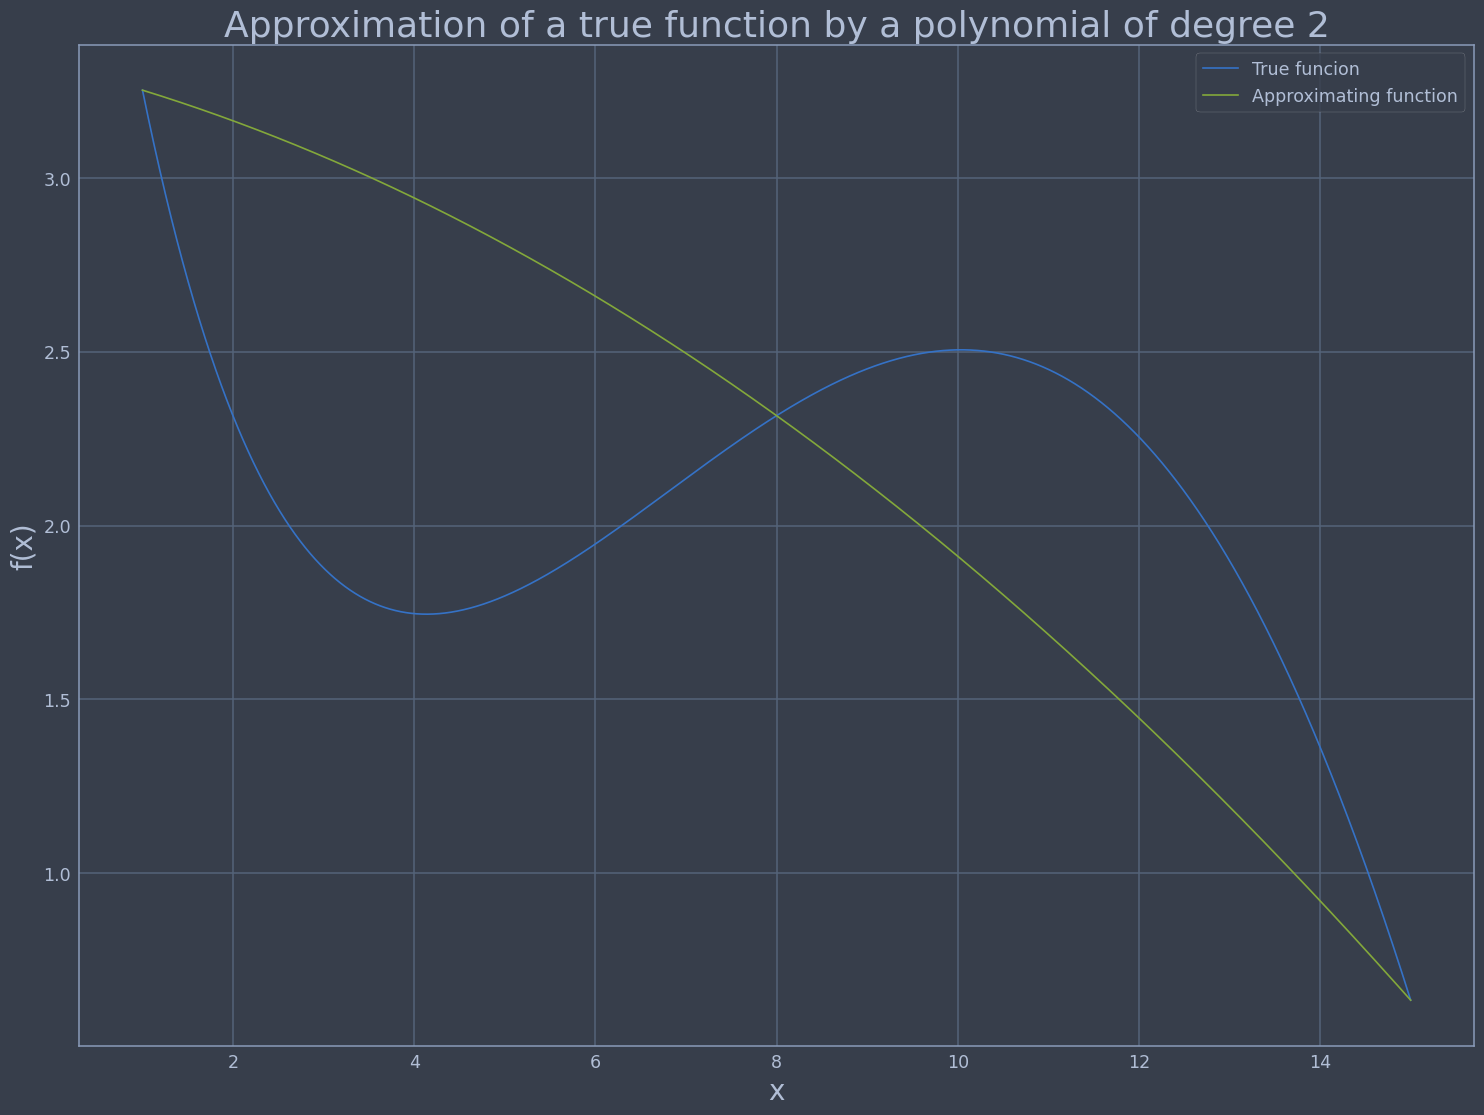

In [68]:
coordinates = [(num, true_funcion(num)) for num in x_values_2]
order = len(coordinates)

coef_matrix_deg_two = np.array([[x_val**n for n in range(order)] for x_val in x_values_2])
free_vector_deg_two = np.array([true_funcion(x_val) for x_val in x_values_2])

result_deg_two = np.linalg.solve(coef_matrix_deg_two, free_vector_deg_two)
print(f"Result = {result_deg_two}")

fig, ax = plt.subplots()
ax.plot(x, true_funcion(x), x, polynomial_of_degree_two(x, result_deg_two))

plt.legend(["True funcion", "Approximating function"])
ax.set_xlabel("x", size=20)
ax.set_ylabel("f(x)", size=20)
ax.set_title(f"Approximation of a true function by a polynomial of degree {order - 1}", size=26);

Result = [ 4.36264154 -1.29552587  0.19333685 -0.00823565]


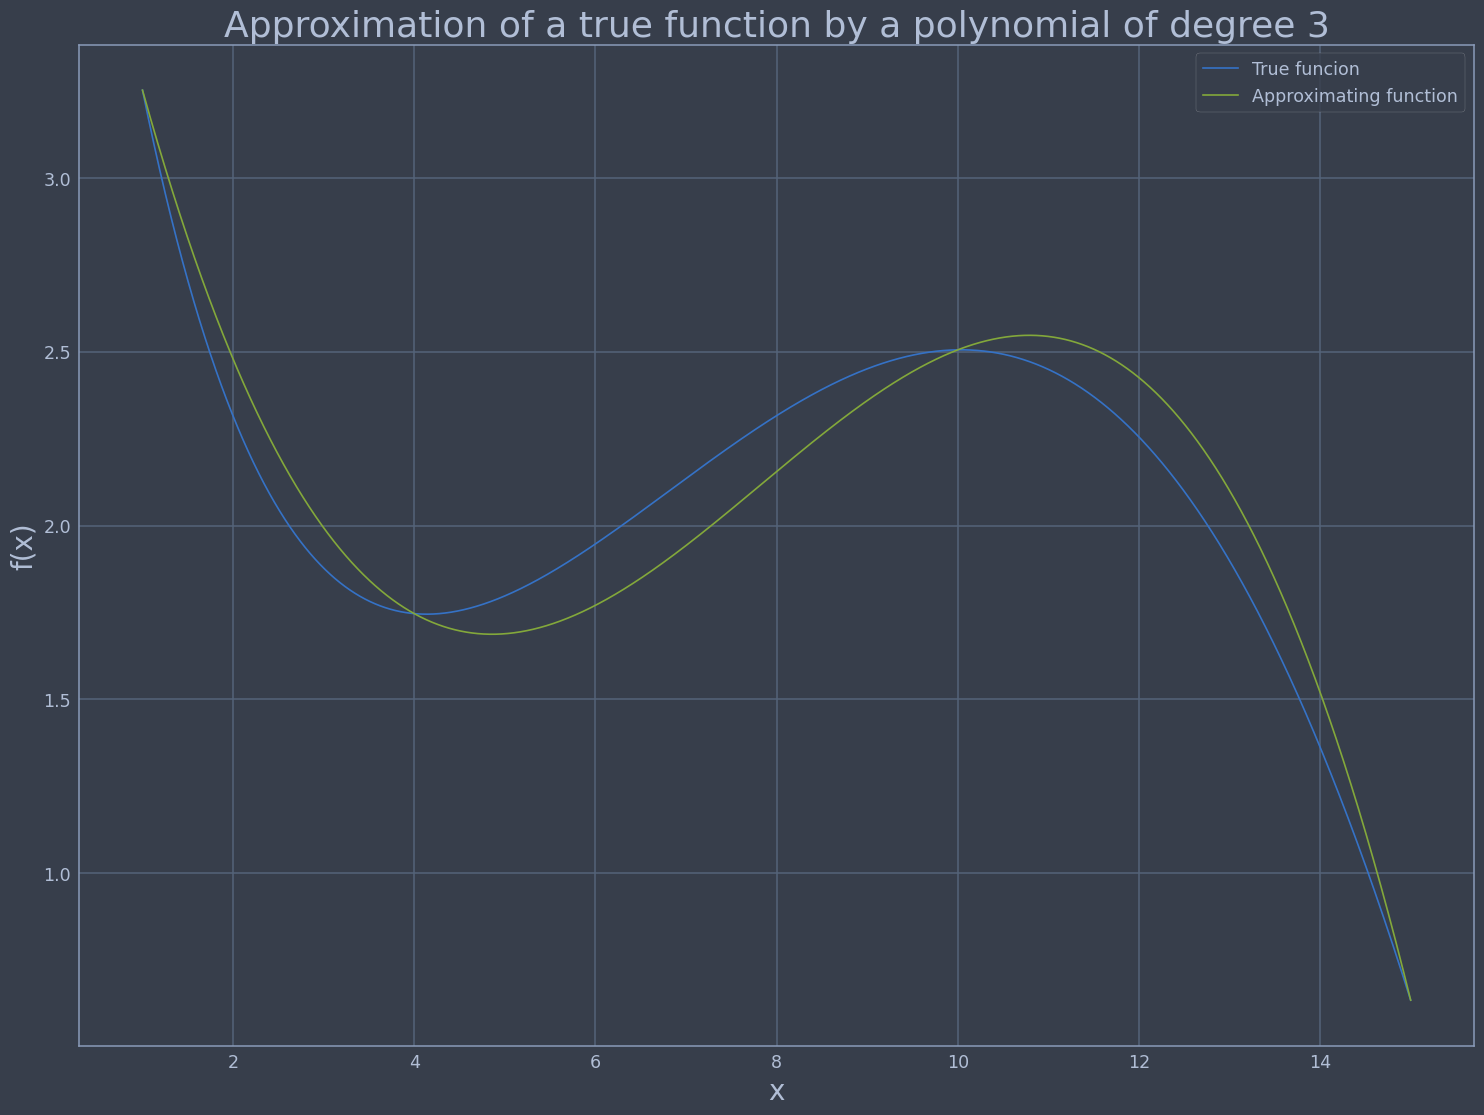

In [69]:
coordinates = [(num, true_funcion(num)) for num in x_values_3]
order = len(coordinates)

coef_matrix_deg_three = np.array([[x_val**n for n in range(order)] for x_val in x_values_3])
free_vector_deg_three = np.array([true_funcion(x_val) for x_val in x_values_3])

result_deg_three = np.linalg.solve(coef_matrix_deg_three, free_vector_deg_three)
print(f"Result = {result_deg_three}")

fig, ax = plt.subplots()
ax.plot(x, true_funcion(x), x, polynomial_of_degree_three(x, result_deg_three))

plt.legend(["True funcion", "Approximating function"])
ax.set_xlabel("x", size=20)
ax.set_ylabel("f(x)", size=20)
ax.set_title(f"Approximation of a true function by a polynomial of degree {order - 1}", size=26);

Result = [ 4.72466181e+00 -1.82185087e+00  3.80748783e-01 -3.25969349e-02
  1.27651443e-03 -2.24382433e-05]


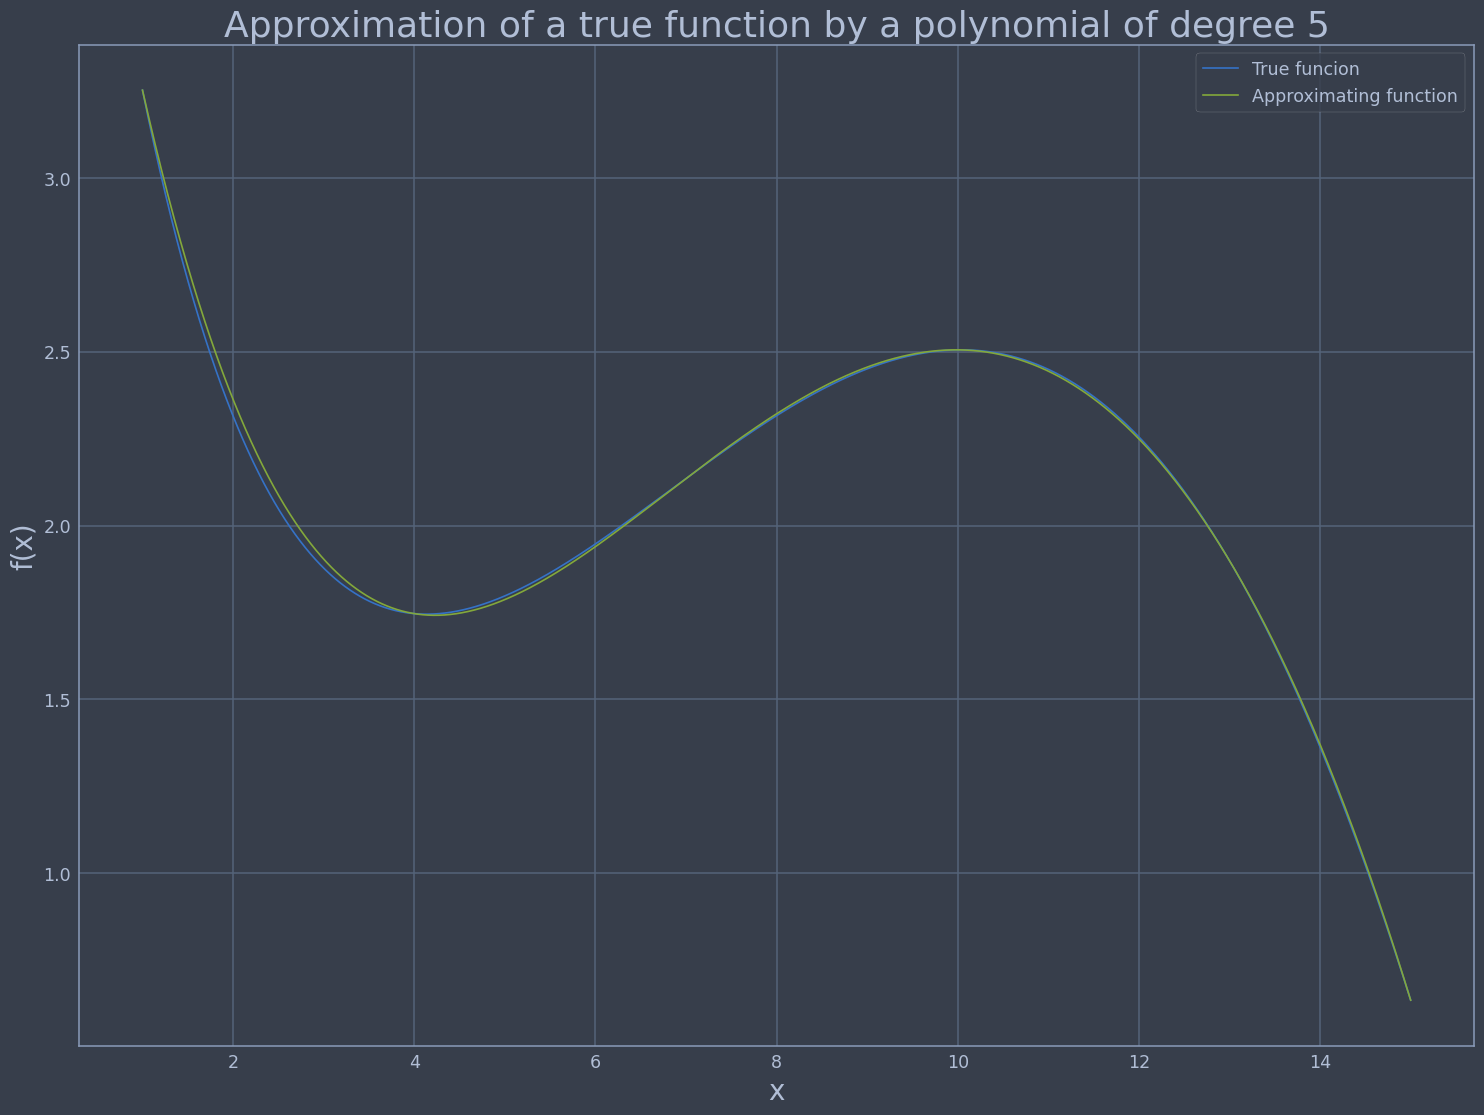

In [74]:
x_values_4 = [1, 4, 7, 10, 13, 15]
coordinates = [(num, true_funcion(num)) for num in x_values_4]
order = len(coordinates)

coef_matrix_deg_n = np.array([[x_val**n for n in range(order)] for x_val in x_values_4])
free_vector_deg_n = np.array([true_funcion(x_val) for x_val in x_values_4])

result_deg_n = np.linalg.solve(coef_matrix_deg_n, free_vector_deg_n)
print(f"Result = {result_deg_n}")

fig, ax = plt.subplots()
ax.plot(x, true_funcion(x), x, approximating_function(x, result_deg_n))

plt.legend(["True funcion", "Approximating function"])
ax.set_xlabel("x", size=20)
ax.set_ylabel("f(x)", size=20)
ax.set_title(f"Approximation of a true function by a polynomial of degree {order - 1}", size=26);

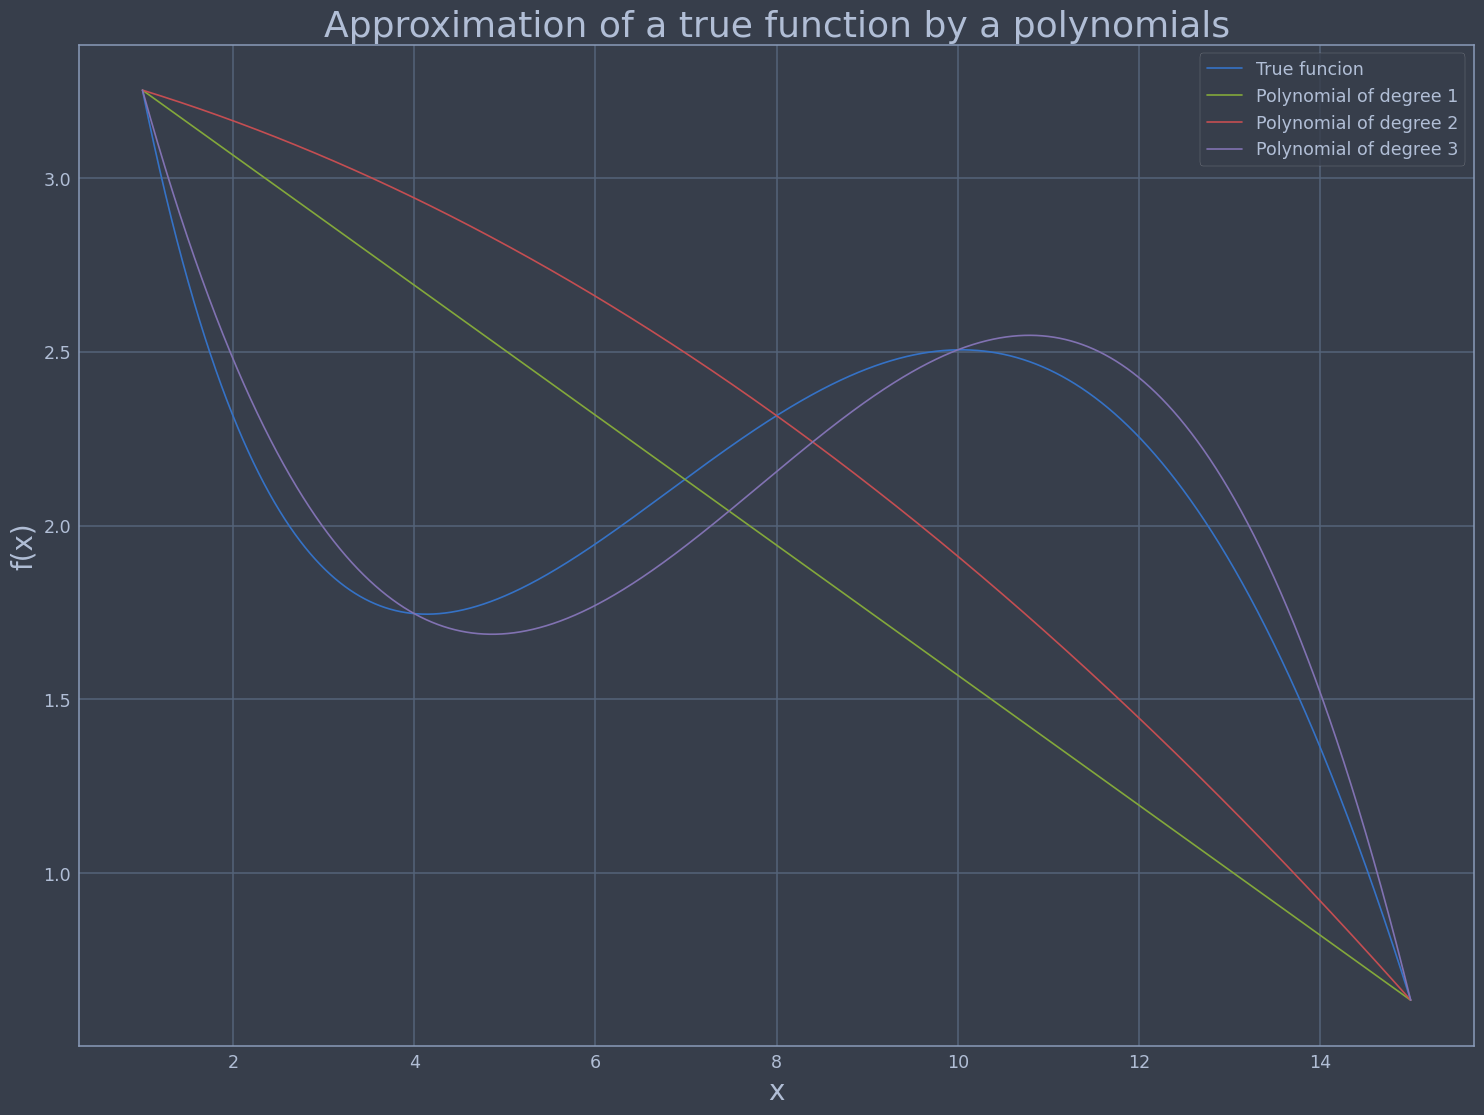

In [87]:
fig, ax = plt.subplots()
ax.plot(x, true_funcion(x), x, polynomial_of_degree_one(x, result_deg_one), 
        x, polynomial_of_degree_two(x, result_deg_two), x, polynomial_of_degree_three(x, result_deg_three))

plt.legend(["True funcion", "Polynomial of degree 1", "Polynomial of degree 2", "Polynomial of degree 3"])
ax.set_xlabel("x", size=20)
ax.set_ylabel("f(x)", size=20)
ax.set_title(f"Approximation of a true function by a polynomials", size=26);

In [ ]:
import numpy

res = []

for num in range(int(input())):
    res.append(numpy.fromstring(input(), sep=" ", dtype="float"))   
      
M1 = numpy.array([elem[:-1] for elem in res])
v1 = numpy.array([elem[-1] for elem in res])

M1 = np.insert(M1, 0, [1], axis=1)
r = numpy.linalg.solve(M1, v1) 

print(*r)

Test
-

# Optimization

Non-smooth function optimization Challenge
--

Задача 1. Минимизация гладкой функции

1. Рассмотрим все ту же функцию из задания по линейной алгебре: 
$$
  \Large f(x) = \sin(x / 5) \cdot e^{x / 10} + 5 \cdot e^{-x / 2}
$$
но теперь уже на промежутке [1, 30].
2. В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.
3. Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.
4. Изучите примеры использования scipy.optimize.minimize в документации Scipy (см. "Материалы").
5. Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.
6. Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.
7. Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.
8. Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с Numpy, Scipy и Matplotlib), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

In [3]:
def func(x):
    return np.sin(x/5) * np.exp(x/10) + 5 * np.exp(-x/2)

def fractured_func(x):
    return np.array(func(x), dtype=int)


x = np.linspace(1, 30, num=10**5)

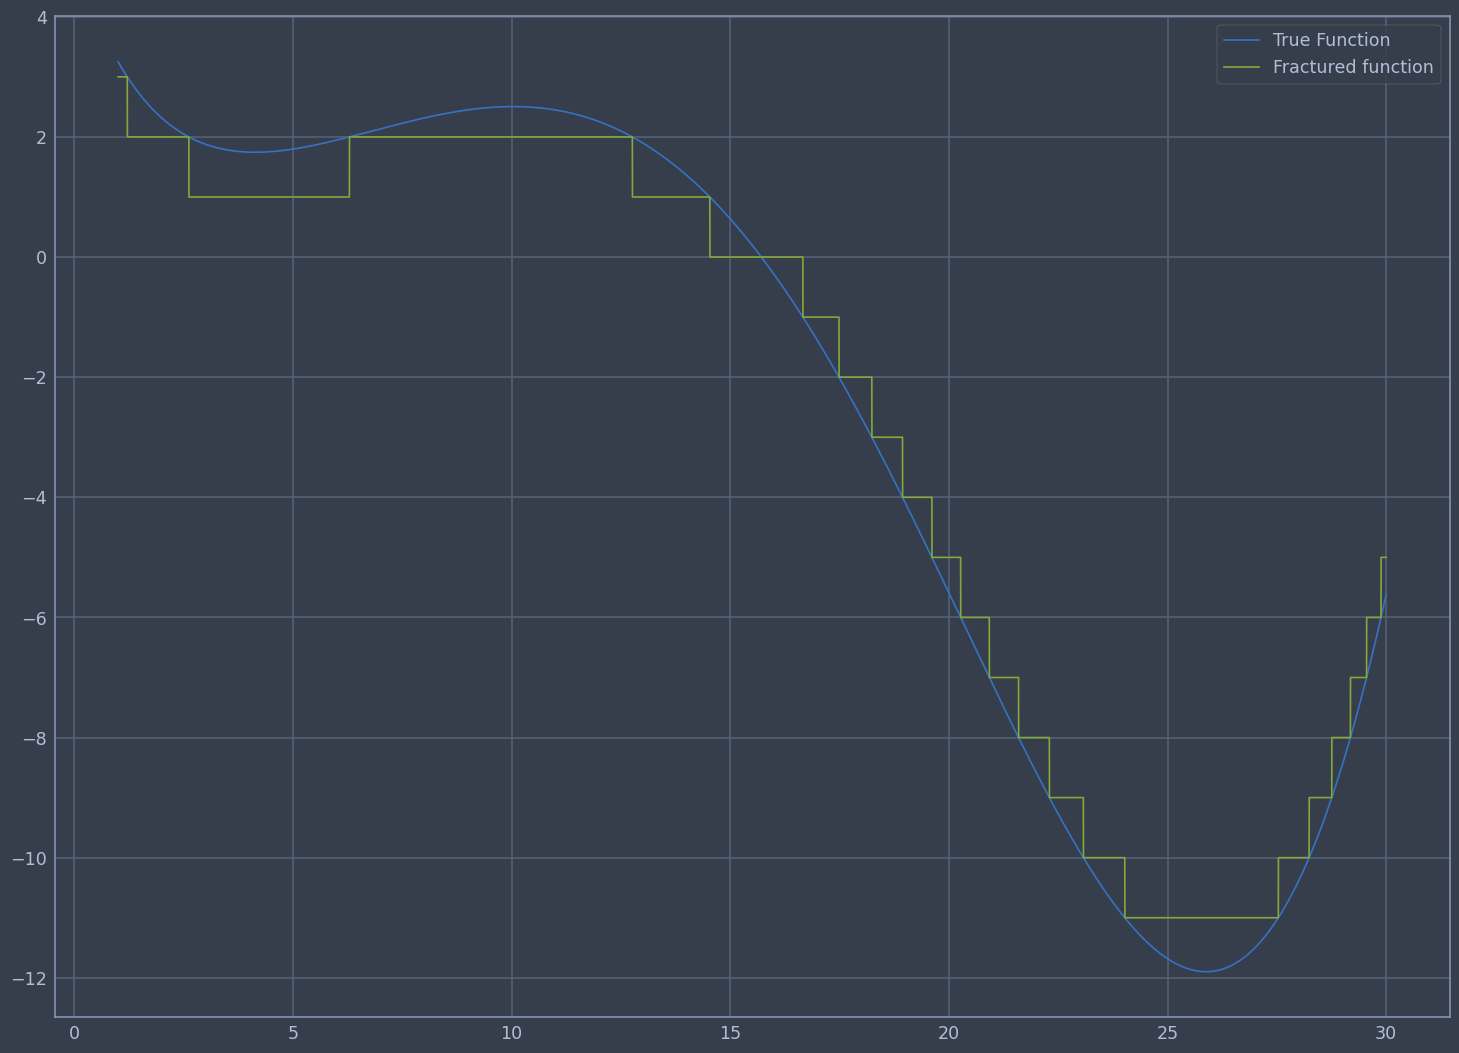

In [9]:
plt.plot(x, func(x))
plt.plot(x, fractured_func(x))
plt.legend(["True Function", "Fractured function"])

In [10]:
result_grad_minimize = scipy.optimize.minimize(func, 5, method="BFGS")

print(result_grad_minimize, end="\n\n")
print(f"Result = {result_grad_minimize.fun}")

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.745268290331984
        x: [ 4.136e+00]
      nit: 6
      jac: [-5.960e-08]
 hess_inv: [[ 6.055e+00]]
     nfev: 14
     njev: 7

Result = 1.745268290331984


In [35]:
result_diff_evolution = scipy.optimize.differential_evolution(func, [(1, 30)])

print(result_diff_evolution, end="\n\n")
print(f"Result = {result_diff_evolution.fun}")

 message: Optimization terminated successfully.
 success: True
     fun: -11.898894665981278
       x: [ 2.588e+01]
     nit: 5
    nfev: 96
     jac: [-1.776e-07]

Result = -11.898894665981278


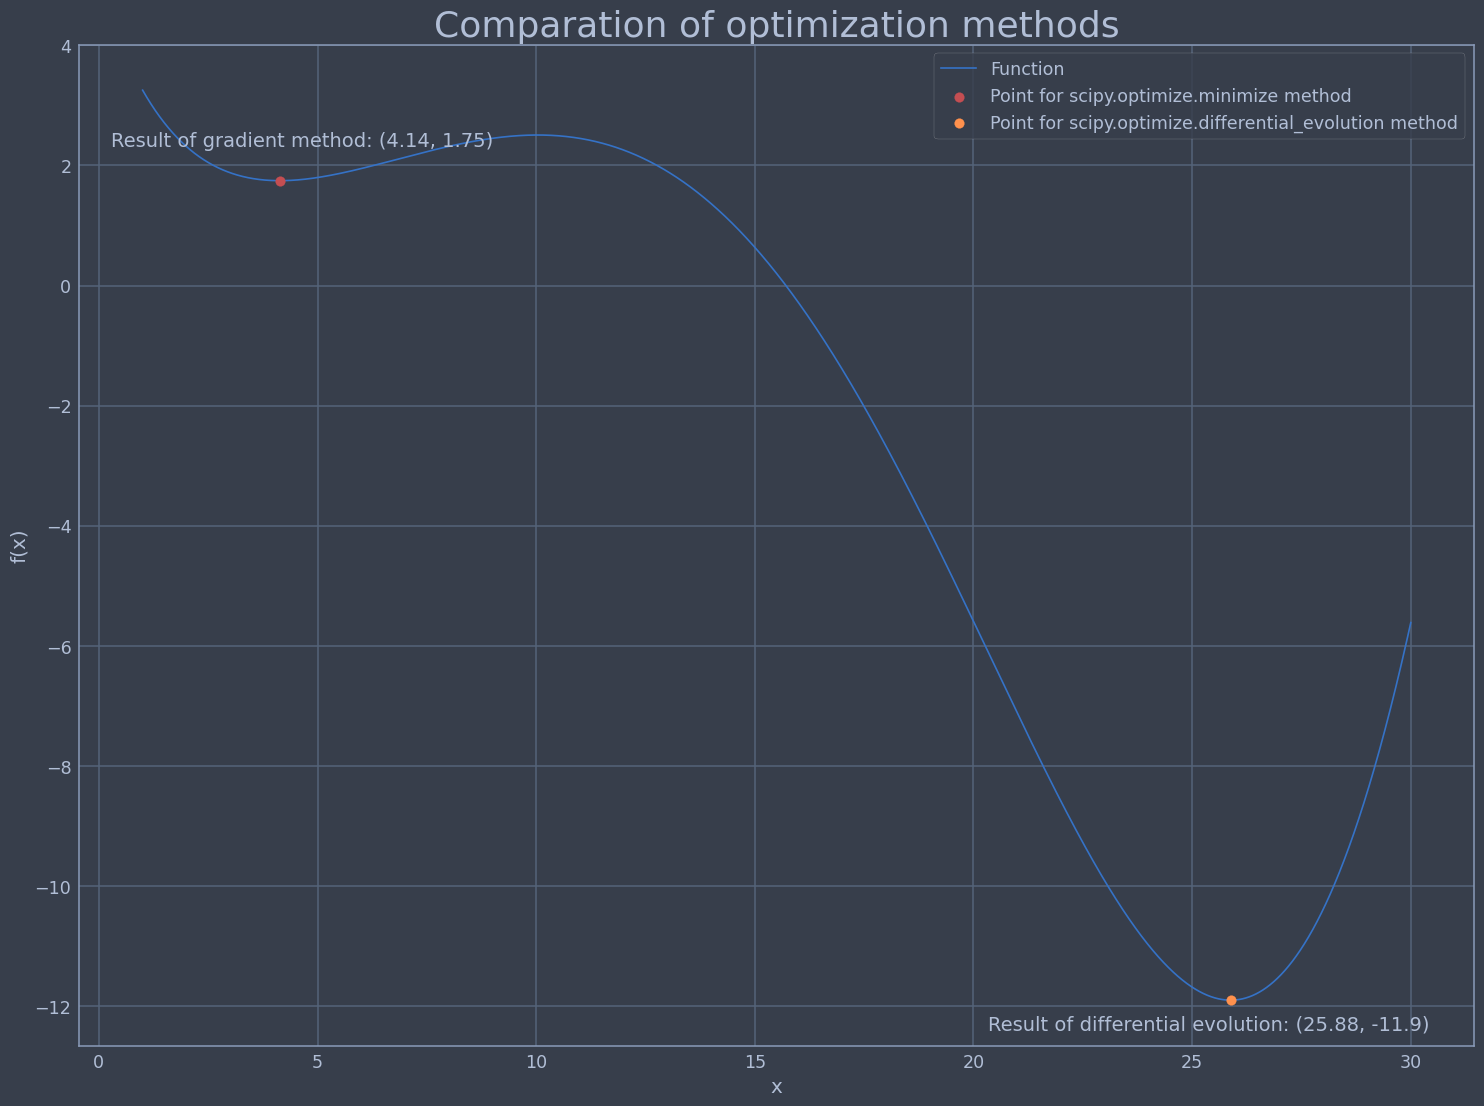

In [36]:
x_res_grad_min = result_grad_minimize.x
y_res_grad_min = result_grad_minimize.fun
x_res_diff_evo = result_diff_evolution.x
y_res_diff_evo = result_diff_evolution.fun

fig, ax = plt.subplots()
ax.plot(x, func(x))

ax.scatter(x_res_grad_min, y_res_grad_min, c="r", s=50, zorder=5)
ax.annotate(f"Result of gradient method: {*x_res_grad_min.round(2), round(y_res_grad_min, 2)}", (x_res_grad_min, y_res_grad_min),
           xytext=(x_res_grad_min + 0.5, y_res_grad_min + 0.5), ha="center", va="bottom", size=14)

ax.scatter(x_res_diff_evo, y_res_diff_evo, c="y", s=50, zorder=5)
ax.annotate(f"Result of differential evolution: {*x_res_diff_evo.round(2), round(y_res_diff_evo, 2)}", (x_res_diff_evo, y_res_diff_evo),
           xytext=(x_res_diff_evo - 0.5, y_res_diff_evo - 0.25), ha="center", va="top", size=14)

plt.legend(["Function", "Point for scipy.optimize.minimize method", "Point for scipy.optimize.differential_evolution method"])
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.set_title("Comparation of optimization methods", size=26);

In [37]:
result_grad_minimize_fractured = scipy.optimize.minimize(fractured_func, 15, method="BFGS")

print(result_grad_minimize_fractured, end="\n\n")
print(f"Result = {result_grad_minimize_fractured.fun}")

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0
        x: [ 1.500e+01]
      nit: 0
      jac: [ 0.000e+00]
 hess_inv: [[1]]
     nfev: 2
     njev: 1

Result = 0


In [38]:
result_diff_evolution_fractured = scipy.optimize.differential_evolution(fractured_func, [(1, 30)])

print(result_diff_evolution_fractured, end="\n\n")
print(f"Result = {result_diff_evolution_fractured.fun}")

 message: Optimization terminated successfully.
 success: True
     fun: -11.0
       x: [ 2.615e+01]
     nit: 3
    nfev: 62

Result = -11.0


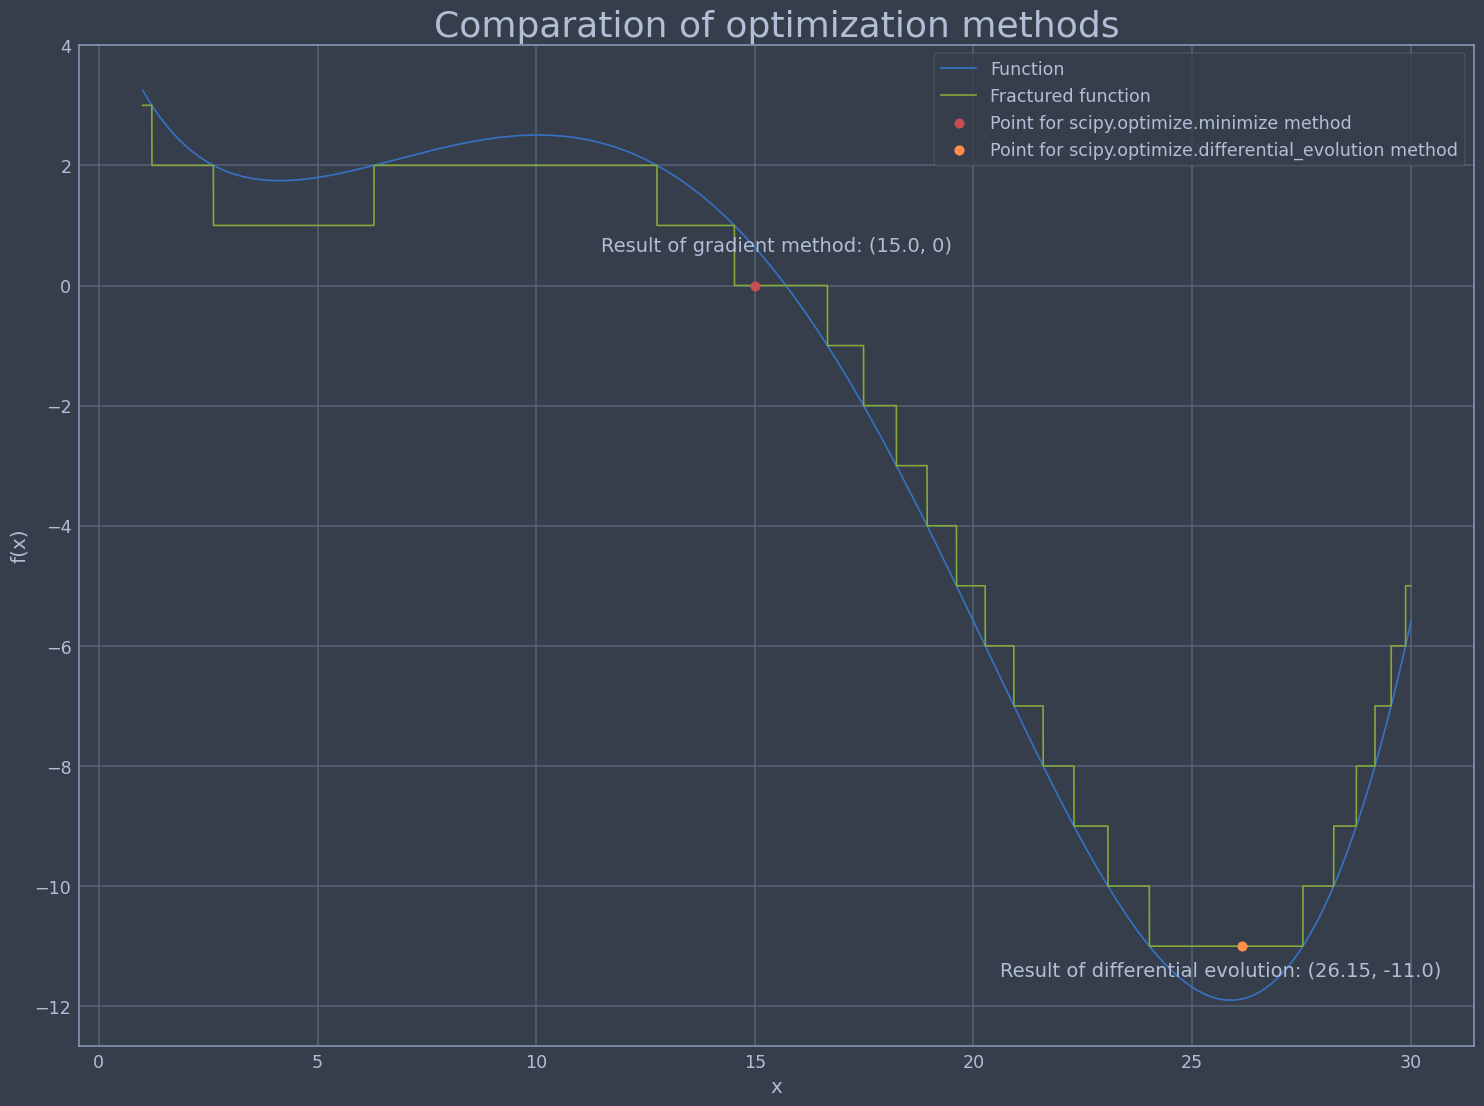

In [40]:
x_res_grad_min = result_grad_minimize_fractured.x
y_res_grad_min = result_grad_minimize_fractured.fun
x_res_diff_evo = result_diff_evolution_fractured.x
y_res_diff_evo = result_diff_evolution_fractured.fun

fig, ax = plt.subplots()
ax.plot(x, func(x))
ax.plot(x, fractured_func(x))

ax.scatter(x_res_grad_min, y_res_grad_min, c="r", s=50, zorder=5)
ax.annotate(f"Result of gradient method: {*x_res_grad_min.round(2), round(y_res_grad_min, 2)}", (x_res_grad_min, y_res_grad_min),
           xytext=(x_res_grad_min + 0.5, y_res_grad_min + 0.5), ha="center", va="bottom", size=14)

ax.scatter(x_res_diff_evo, y_res_diff_evo, c="y", s=50, zorder=5)
ax.annotate(f"Result of differential evolution: {*x_res_diff_evo.round(2), round(y_res_diff_evo, 2)}", (x_res_diff_evo, y_res_diff_evo),
           xytext=(x_res_diff_evo - 0.5, y_res_diff_evo - 0.25), ha="center", va="top", size=14)

plt.legend(["Function", "Fractured function", "Point for scipy.optimize.minimize method", "Point for scipy.optimize.differential_evolution method"])
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.set_title("Comparation of optimization methods", size=26);

# Probability and Statistics

Central Limit Theorem Challenge
--

Интересные рапспределения:
- Парето
- Лапласа
- Треугольное
- Бета-распределение
- Экспоненциальное

In [463]:
# Определение исходных значений параметров
num_samples = [5, 10, 30, 50, 100, 1000]
sample_size = 1000
distribution_range = 5

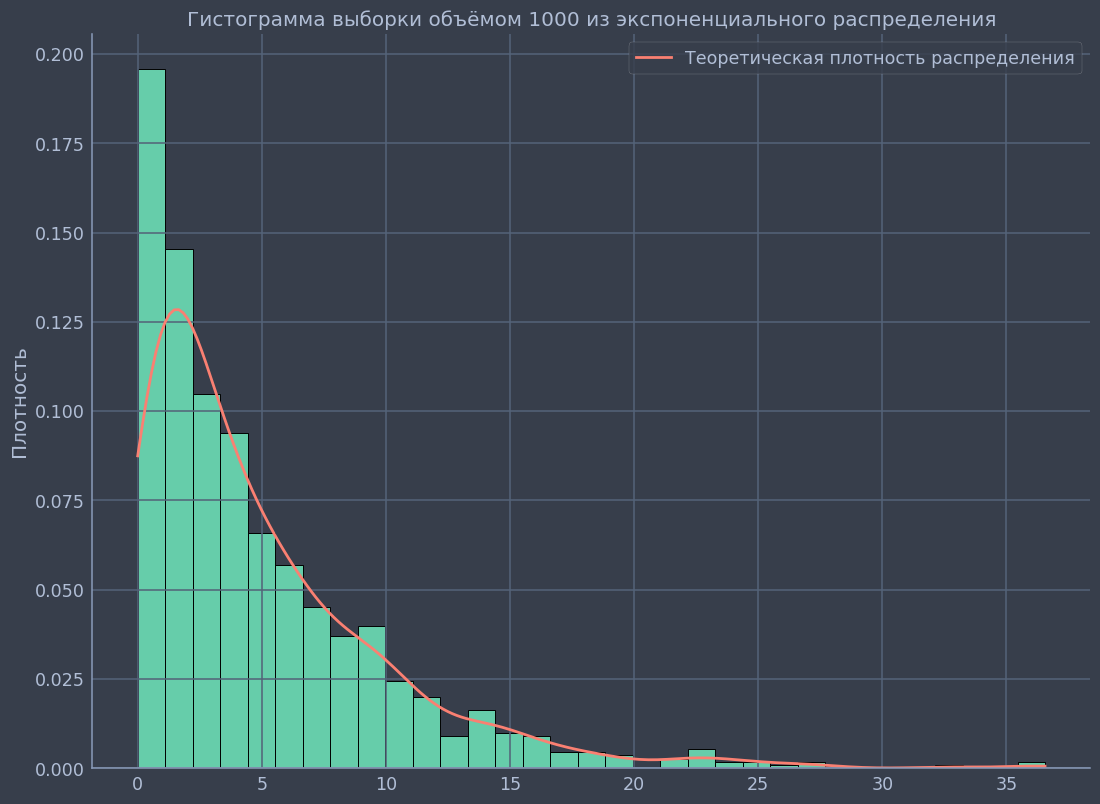

In [465]:
# Генерация выборки из экспоненциального распределения 
one_sample = np.random.exponential(distribution_range, size=sample_size)

# Построение гистограммы 
sns.displot(data=one_sample, kde=True, stat="density", line_kws=dict(linewidth=2), color='salmon', 
            facecolor='mediumaquamarine', edgecolor='black', linewidth=0.7, height=8, 
            aspect=1.4).set(title=f"Гистограмма выборки объёмом {sample_size} из экспоненциального распределения", ylabel="Плотность")
plt.legend(["Теоретическая плотность распределения"])

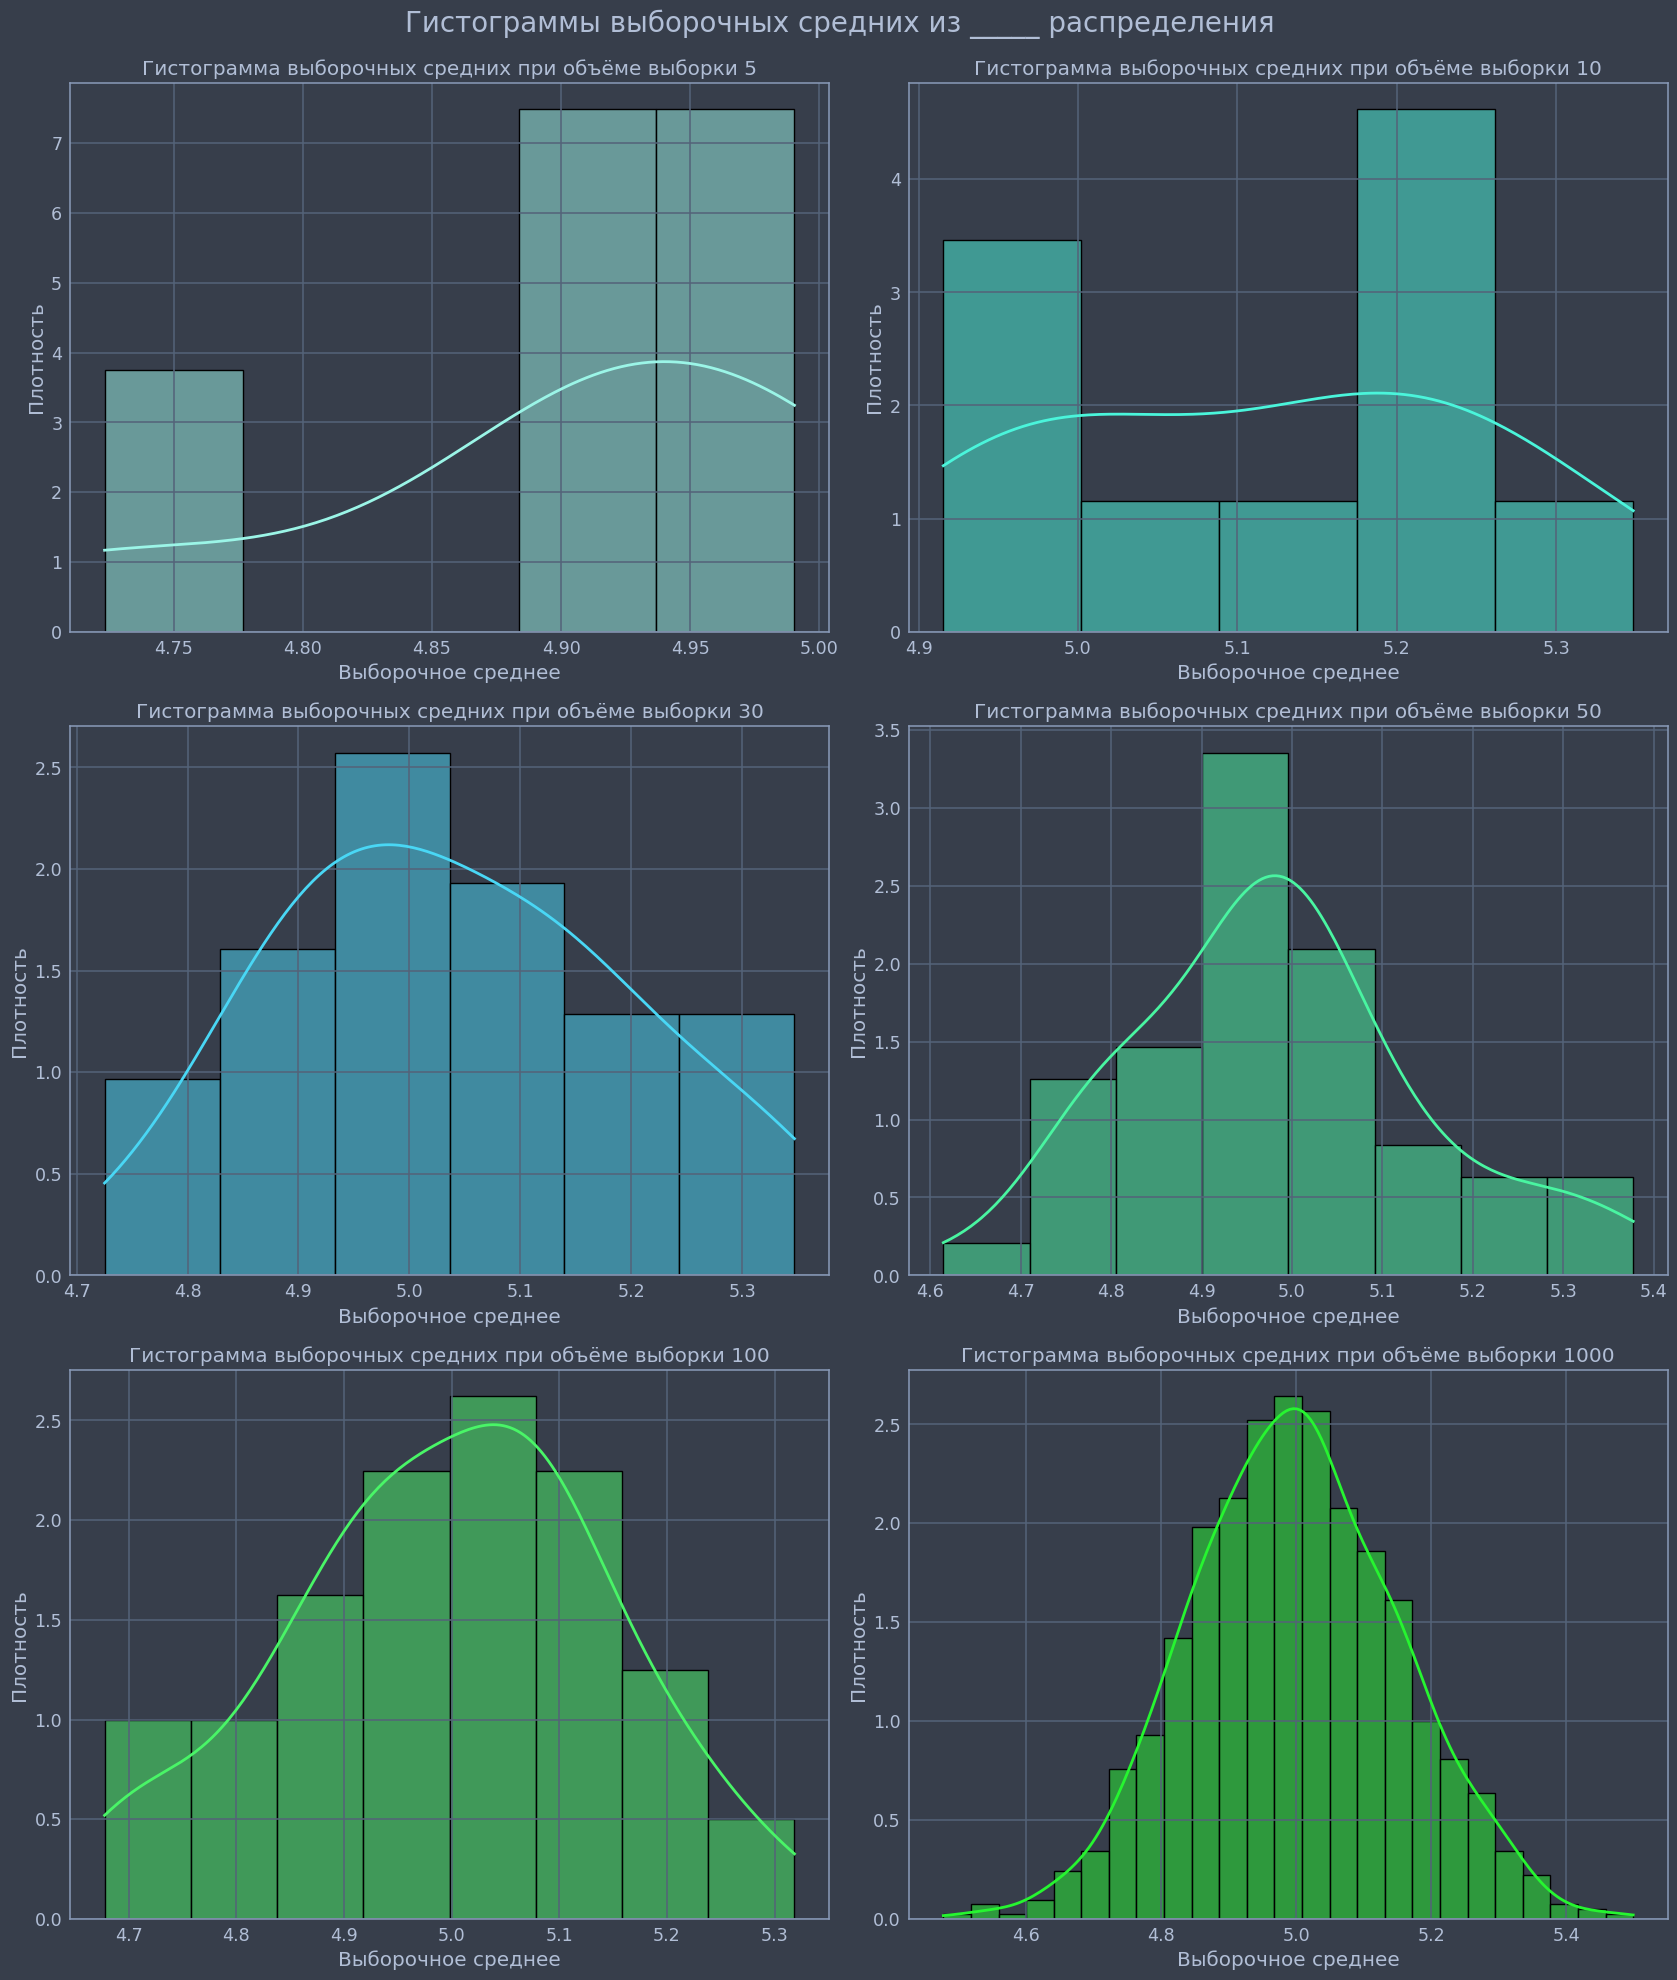

In [35]:
fig, ax = plt.subplots(3, 2, figsize=(17, 20))
ax = ax.ravel()

colors = ["#9BF5E7", "#4AF5DB", "#49D7F5", "#49F5A1", "#49F567", "#26F530"] # кастомные цвета

for n, i in zip(num_samples, range(len(num_samples))):
    # Генерация выборки из экспоненциального распределения 
    samples = np.random.exponential(distribution_range, (n, sample_size))
    # Расчёт выборочного среднего
    sample_mean = np.mean(samples, axis=1)

    # Построение гистограмм для выборочного среднего в зависимости от объёма выборки n
    sns.histplot(x=sample_mean, kde=True, stat="density", color=colors[i], line_kws=dict(linewidth=2), 
                 edgecolor='black', linewidth=1, ax=ax[i]).set(title=f"Гистограмма выборочных средних при объёме выборки {n}", 
                                                               xlabel="Выборочное среднее", ylabel="Плотность")
fig.suptitle("Гистограммы выборочных средних из _____ распределения", y=0.99, size=20)   
fig.tight_layout()

---

Можно (и нужно?) использовать методиы из библиотеки scipy.stats: https://docs.scipy.org/doc/scipy/reference/stats.html
В них можно получить теоретические значения и значения для конкретной выборки. 
NumPy я использую, поскольку он был в примере, который я нагуглил, а также с помощью него можно построить гистрограммы на одном графике. С помощью SciPy я пока не понял, как это сделать. 

In [34]:
# Определение исходных значений параметров
num_samples = [5, 10, 30, 50, 100, 1000]
sample_size = 1000
parameter = 10

x = np.linspace(0, 10*parameter, 10**5)

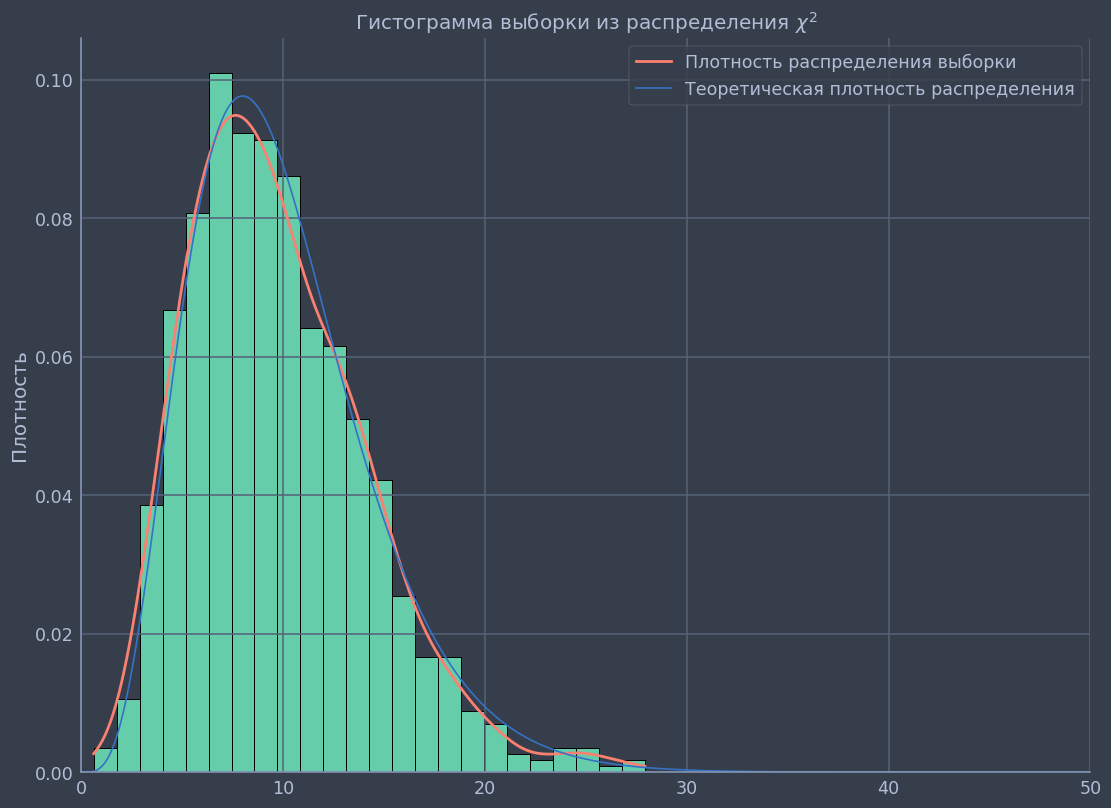

In [35]:
# Определение среднего и дисперсии выбранного распределения (Хи-квадрат, в данном случае)
mean_chisquare, variance_chisquare = scipy.stats.chi2.stats(parameter, moments='mv')

# Генерация выборки из распределения Хи-квадрат
one_sample = scipy.stats.chi2.rvs(parameter, size=sample_size)

# Построение гистограммы 
sns.displot(data=one_sample, kde=True, stat="density", line_kws=dict(linewidth=2), color='salmon', 
            facecolor='mediumaquamarine', edgecolor='black', linewidth=0.7, height=8, 
            aspect=1.4).set(title="Гистограмма выборки из распределения $\chi^2$", ylabel="Плотность")
plt.plot(x, scipy.stats.chi2(parameter).pdf(x))

plt.legend(["Плотность распределения выборки", "Теоретическая плотность распределения"])
plt.xlim([0, 5*parameter]);

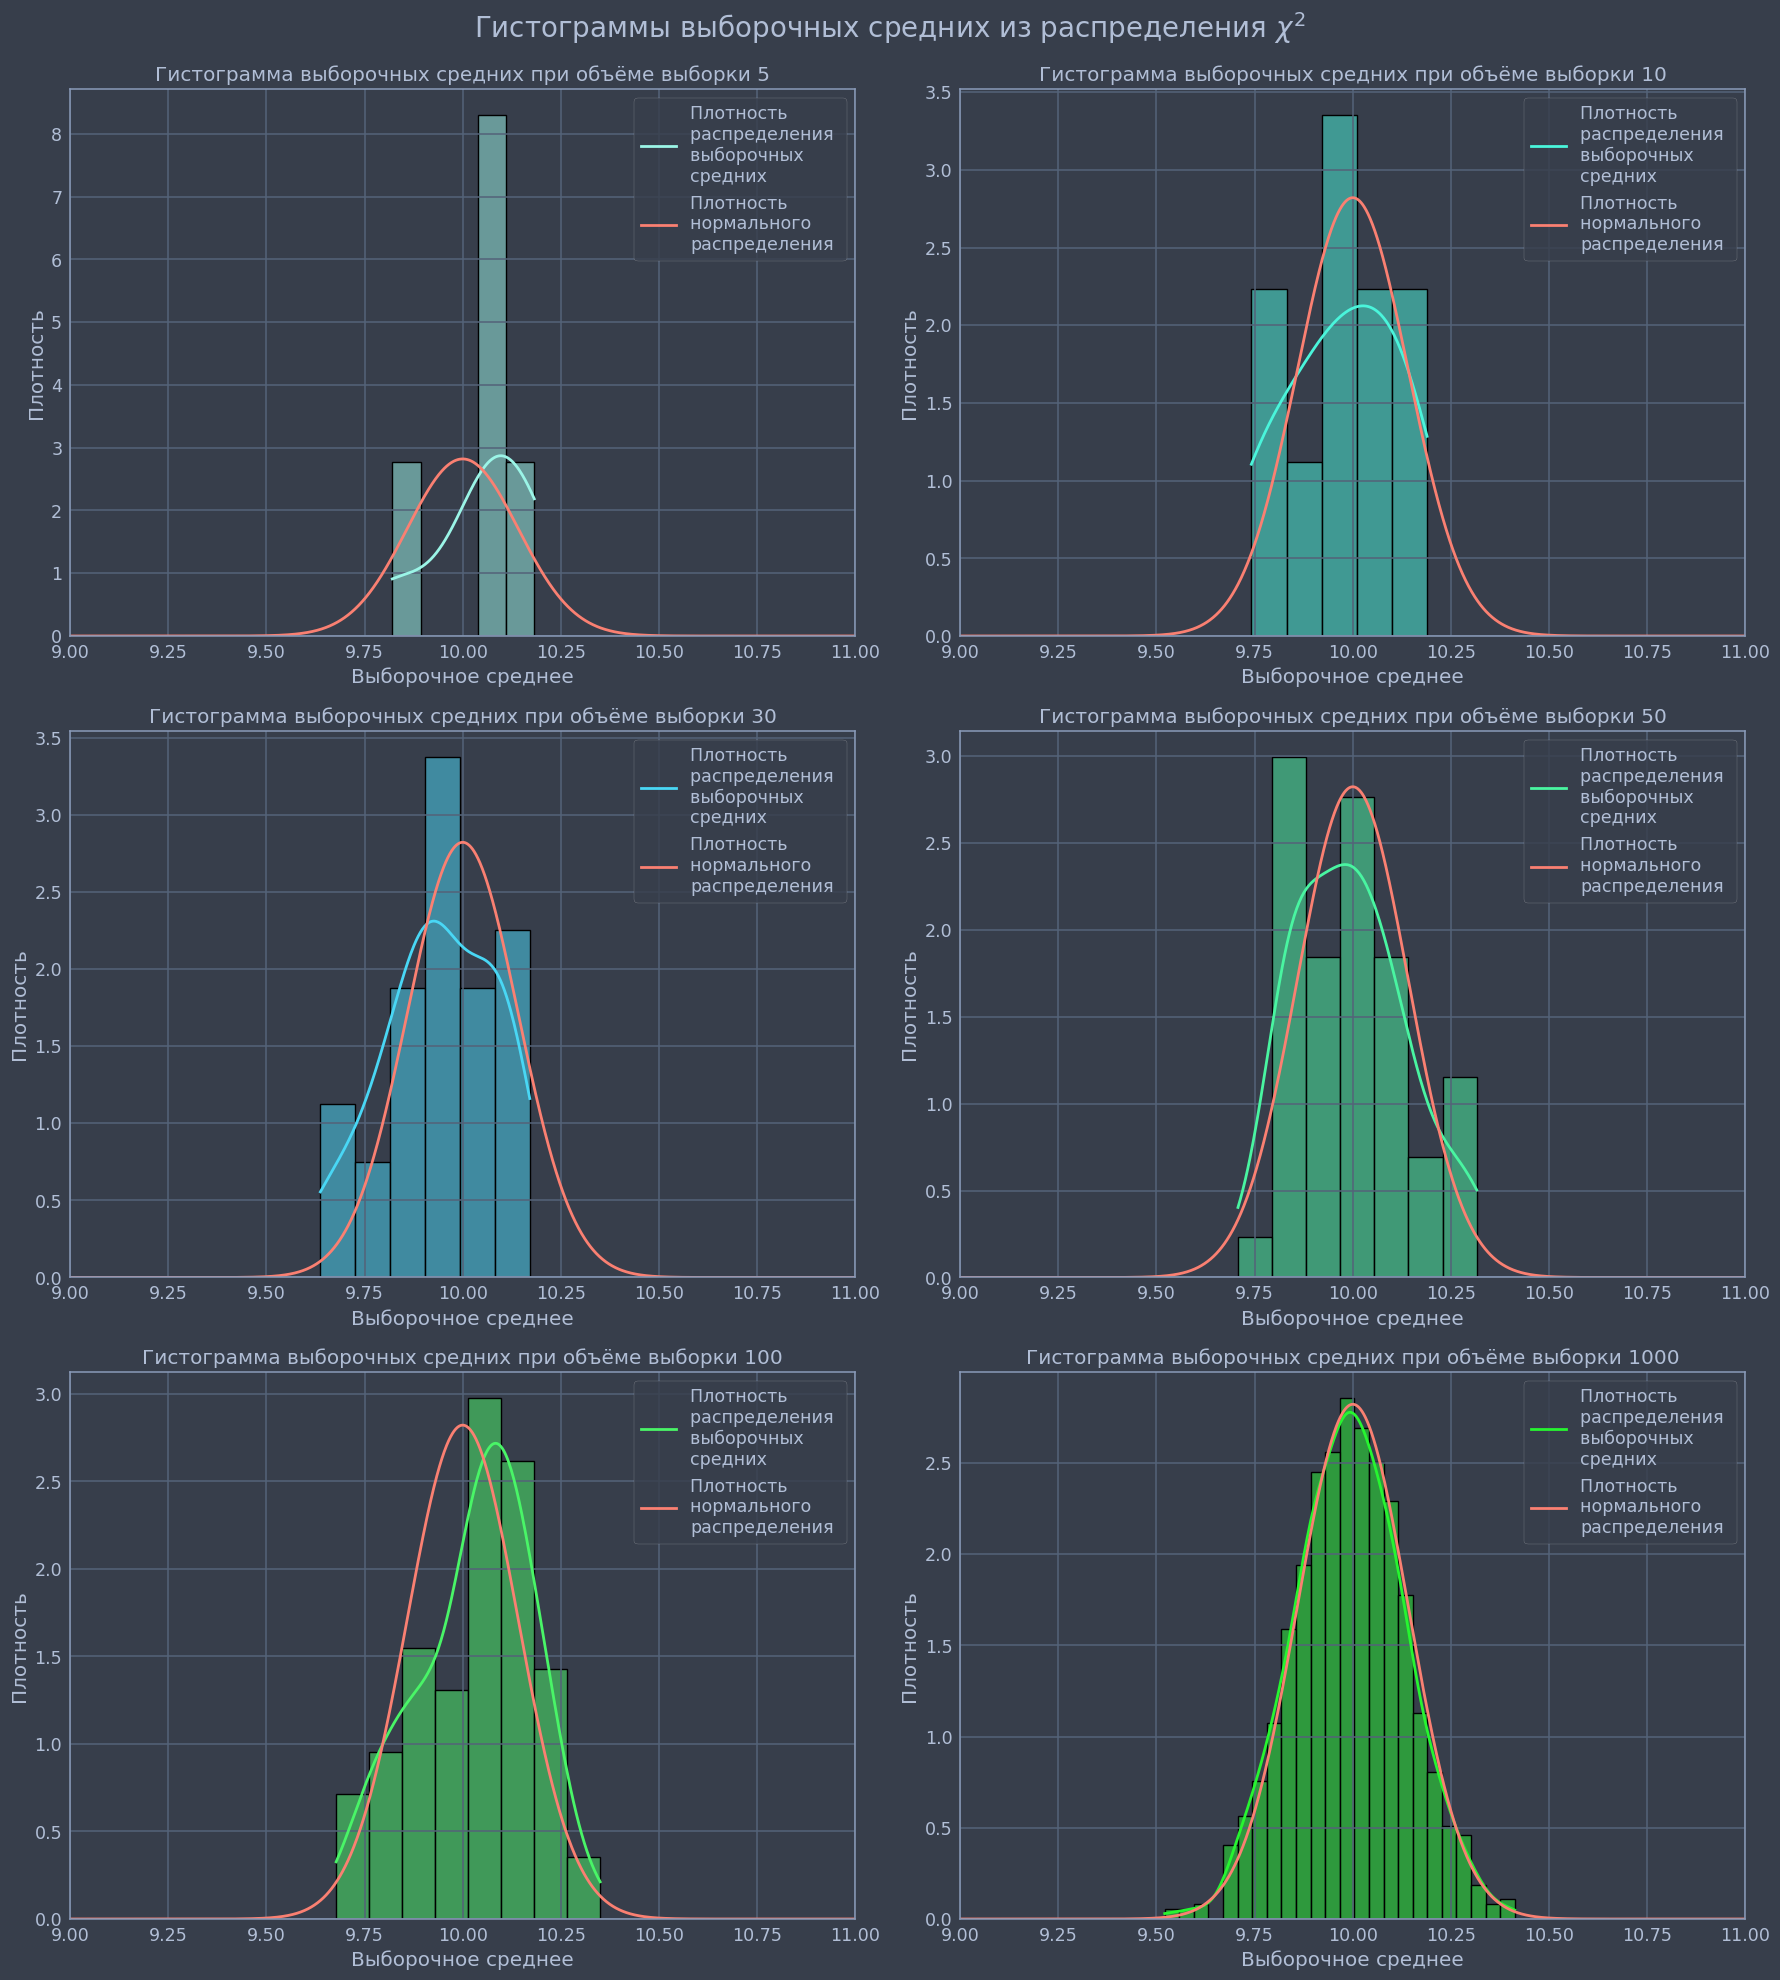

In [36]:
fig, ax = plt.subplots(3, 2, figsize=(18, 20))
ax = ax.ravel()

colors = ["#9BF5E7", "#4AF5DB", "#49D7F5", "#49F5A1", "#49F567", "#26F530"] # кастомные цвета

for n, i in zip(num_samples, range(len(num_samples))):
    # Генерация выборок из распределения Хи-квадрат 
    samples_chisquare = np.random.chisquare(parameter, (n, sample_size))
    # Расчёт выборочного среднего для каждой выборки
    chisquare_samples_mean = np.mean(samples_chisquare, axis=1)

    # Построение гистограмм для выборочных средних в зависимости от объёма выборки n
    sns.histplot(x=chisquare_samples_mean, bins="auto", kde=True, stat="density", color=colors[i], line_kws=dict(linewidth=2), 
                 edgecolor='black', linewidth=1, ax=ax[i]).set(title=f"Гистограмма выборочных средних при объёме выборки {n}", 
                                                               xlabel="Выборочное среднее", ylabel="Плотность")
    ax[i].plot(x, scipy.stats.norm(loc=(mean_chisquare), scale=(np.sqrt(variance_chisquare / sample_size))).pdf(x), 
              color="salmon", lw=2)
    
    ax[i].legend([f"Плотность \nраспределения \nвыборочных \nсредних", f"Плотность \nнормального \nраспределения"])
    ax[i].set_xlim(mean_chisquare - 0.1*mean_chisquare, mean_chisquare + 0.1*mean_chisquare)
    
fig.suptitle(r"Гистограммы выборочных средних из распределения $\chi^2$", y=0.99, size=20)   
fig.tight_layout()

(4.5, 5.5)

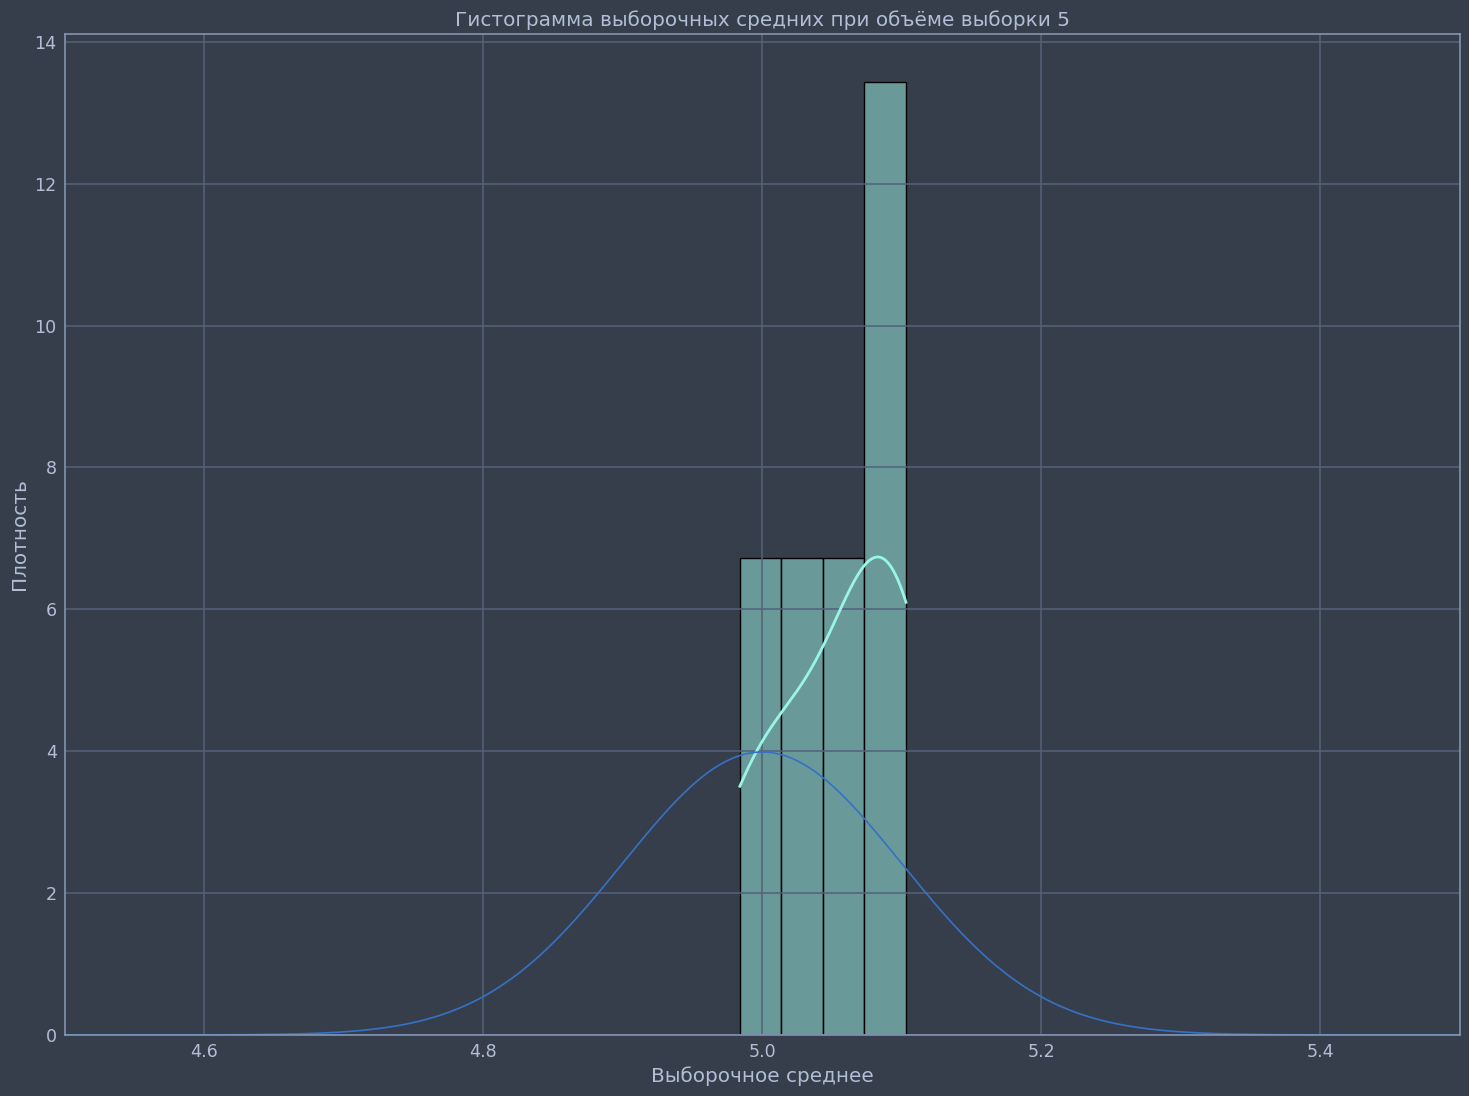

In [482]:
samples_chisquare = np.random.chisquare(parameter, (n, sample_size))

chisquare_samples_mean = np.mean(samples_chisquare, axis=1)


sns.histplot(x=chisquare_samples_mean, kde=True, stat="density", color=colors[i], line_kws=dict(linewidth=2), 
            edgecolor='black', linewidth=1).set(title=f"Гистограмма выборочных средних при объёме выборки {n}", 
                                                               xlabel="Выборочное среднее", ylabel="Плотность")

plt.plot(x, scipy.stats.norm(loc=(mean_chisquare), scale=(np.sqrt(variance_chisquare / sample_size))).pdf(x))
plt.xlim(4.5, 5.5)

In [416]:
mean_chisquare, variance_chisquare = scipy.stats.chi2.stats(parameter, moments='mv')
mean_chisquare, variance_chisquare

(5.0, 10.0)

In [417]:
scipy.stats.norm(mean_chisquare, np.sqrt(variance_chisquare)).stats(moments='mv')

(5.0, 10.000000000000002)

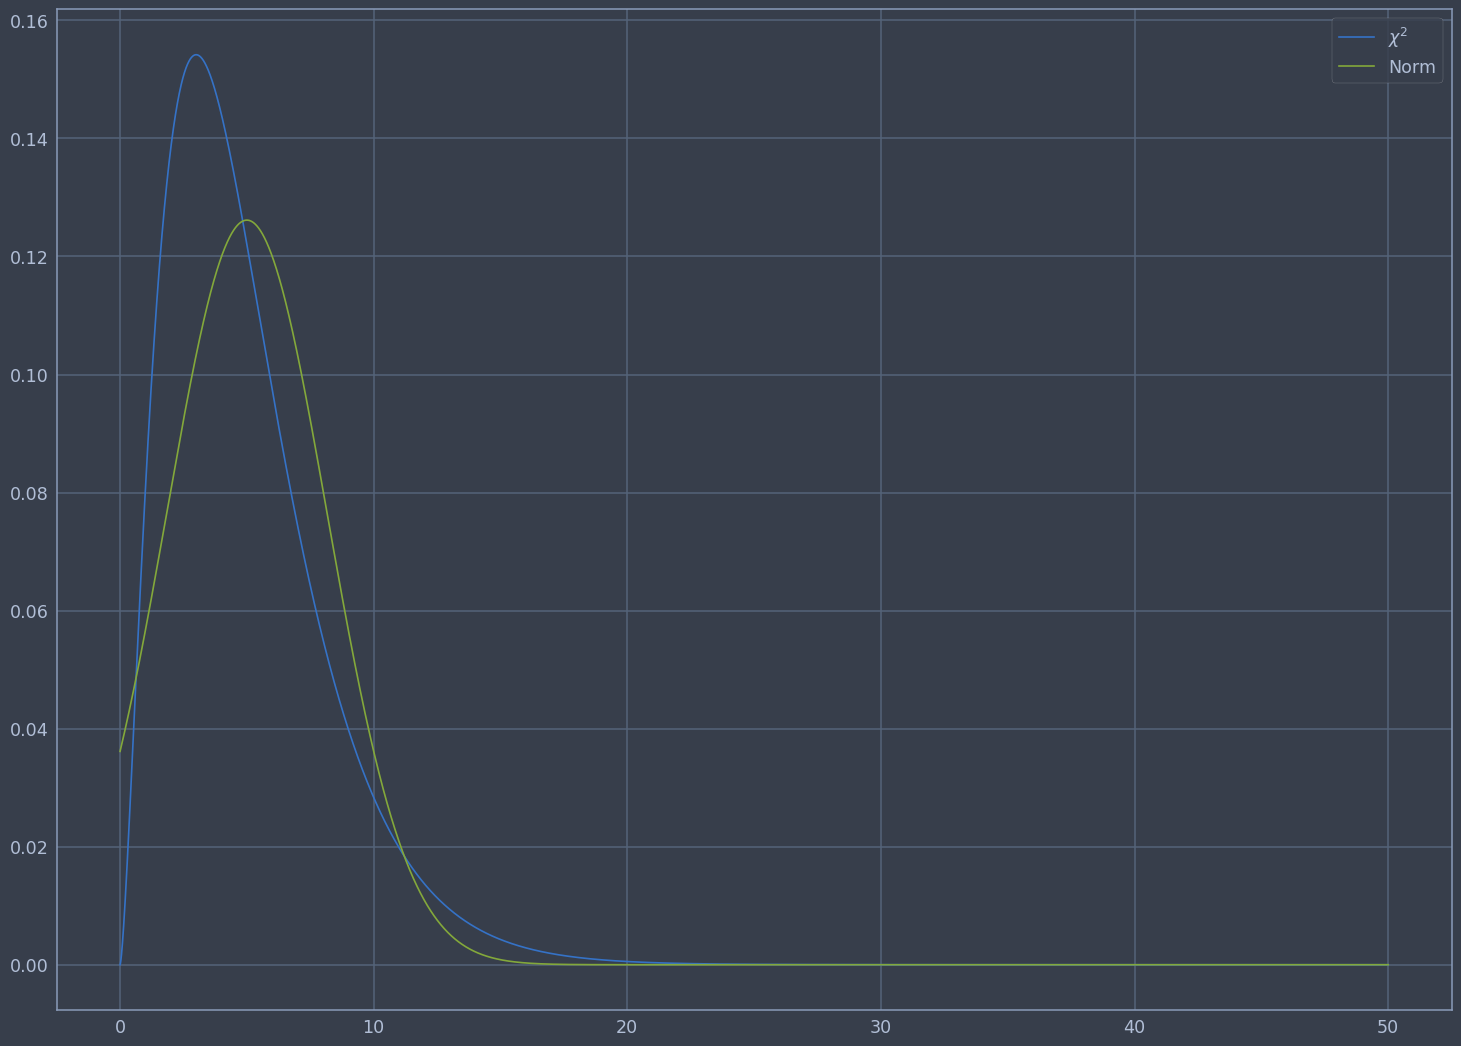

In [418]:
mean_chisquare, variance_chisquare = scipy.stats.chi2.stats(parameter, moments='mv')

plt.plot(x, scipy.stats.chi2(parameter).pdf(x))
plt.plot(x, scipy.stats.norm(mean_chisquare, np.sqrt(variance_chisquare)).pdf(x))

plt.legend(["$\chi^2$", "Norm"])
# plt.xlim(0, 20)

(4.5, 5.5)

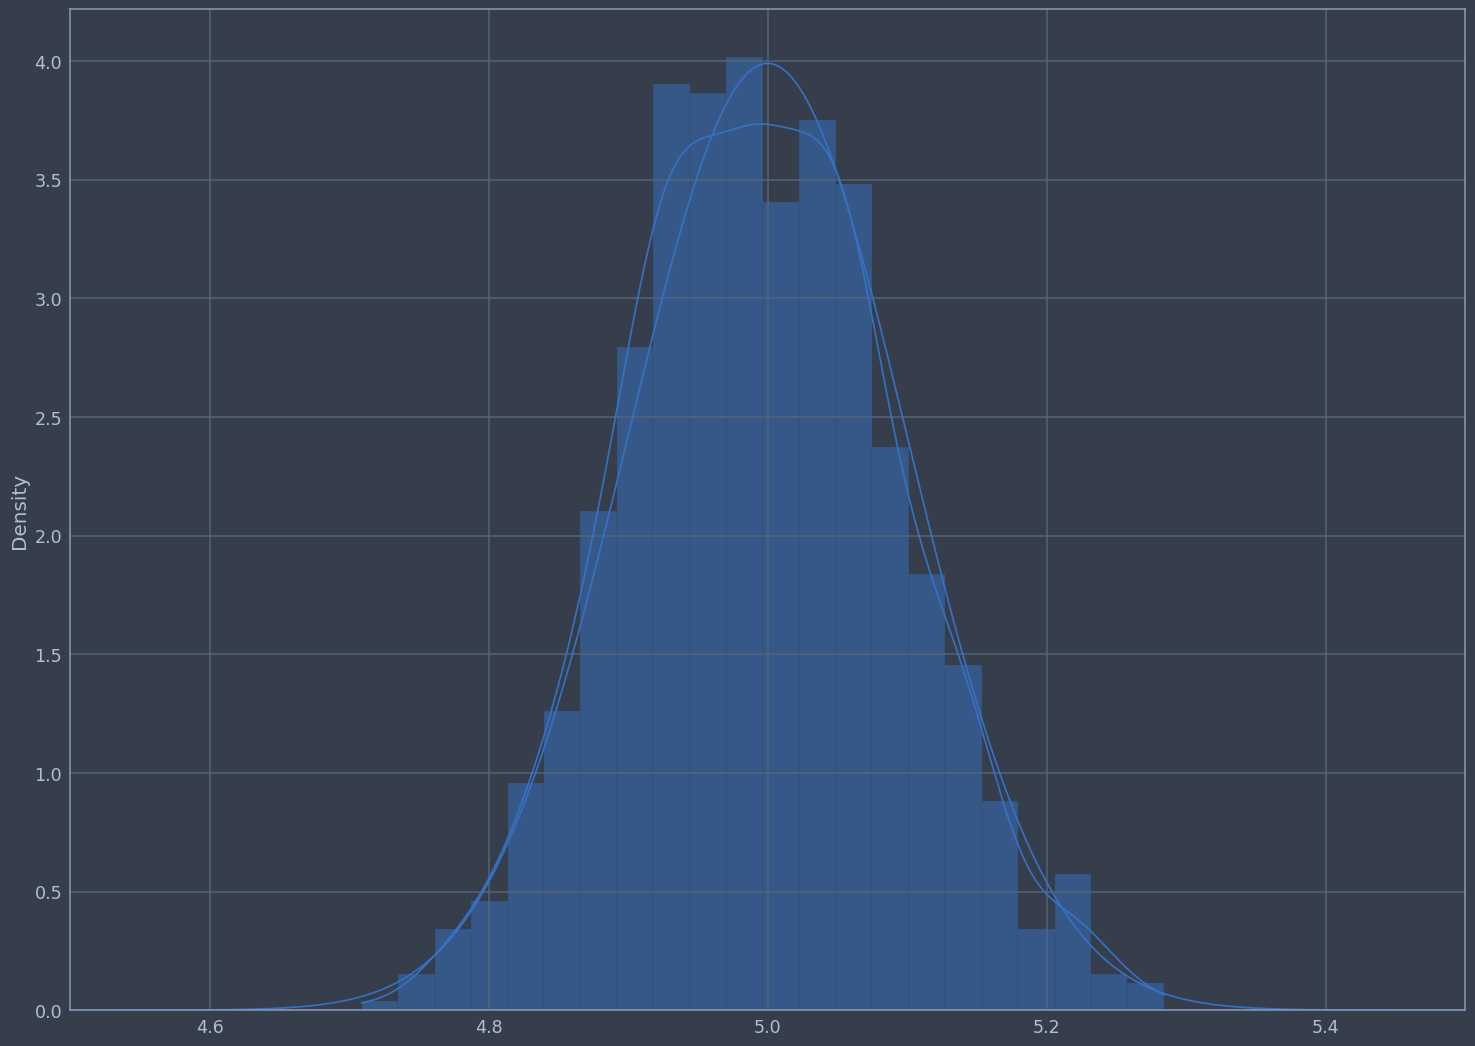

In [421]:
sns.histplot(x=chisquare_samples_mean, kde=True, stat="density")
plt.plot(x, scipy.stats.norm(loc=(mean_chisquare), scale=(np.sqrt(variance_chisquare / n))).pdf(x))
plt.xlim(4.5, 5.5)

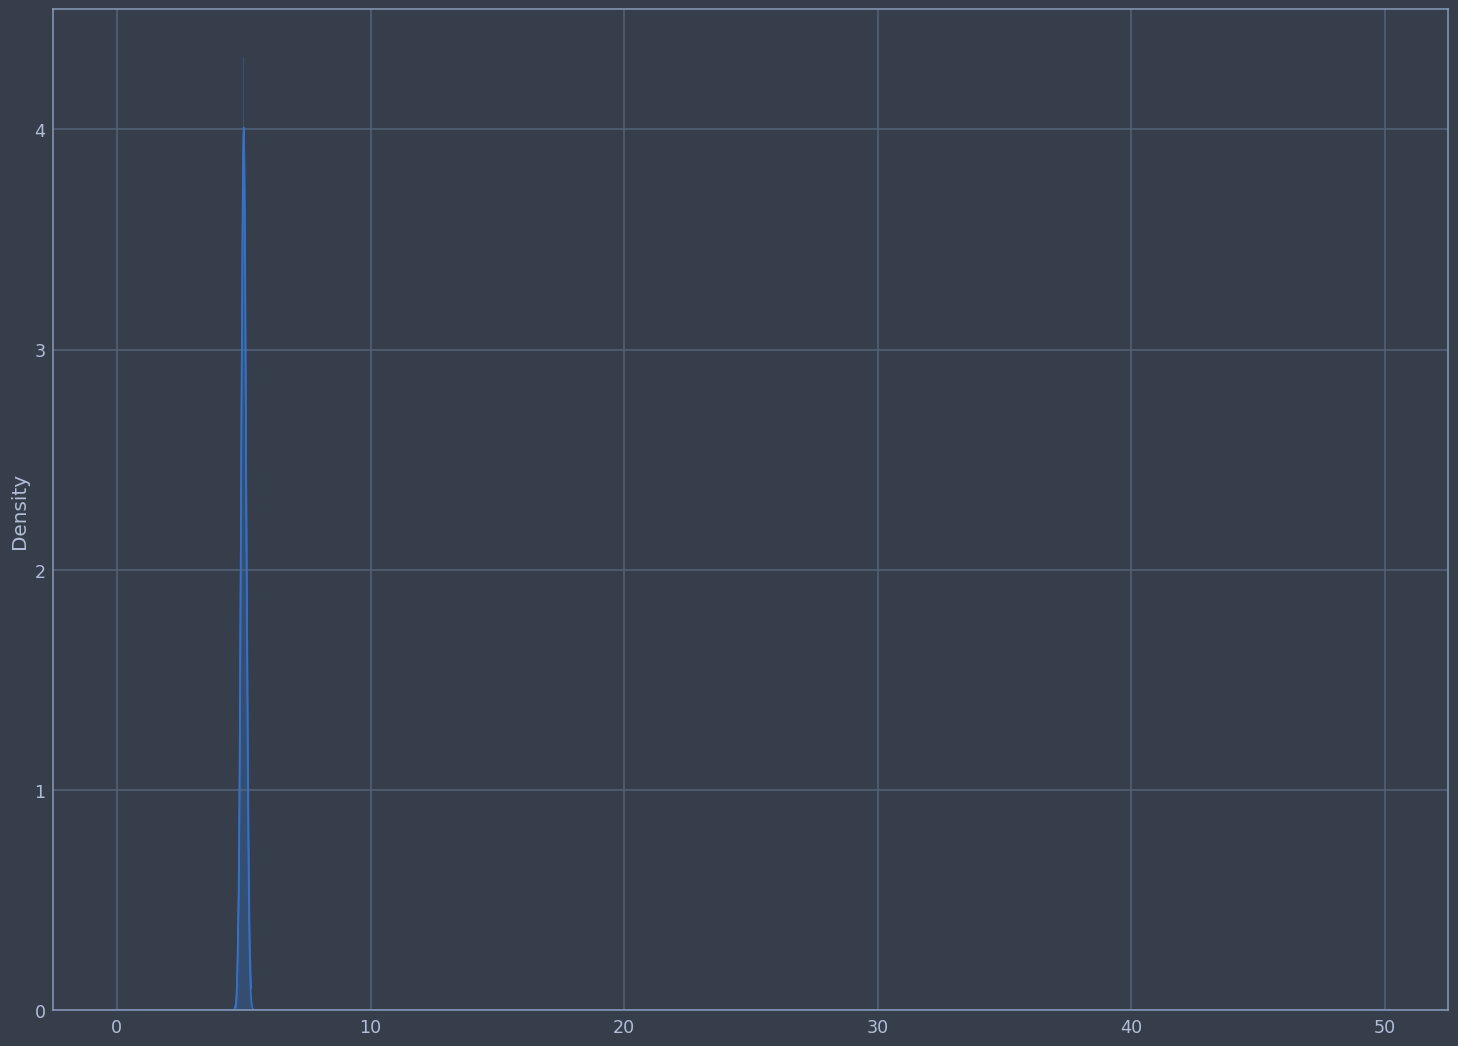

In [435]:
sns.histplot(x=chisquare_samples_mean, kde=True, stat="density")
plt.plot(x, scipy.stats.norm(loc=(mean_chisquare), scale=(np.sqrt(variance_chisquare / n))).pdf(x))

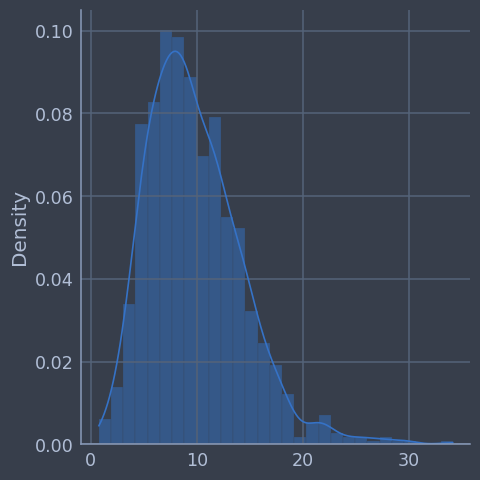

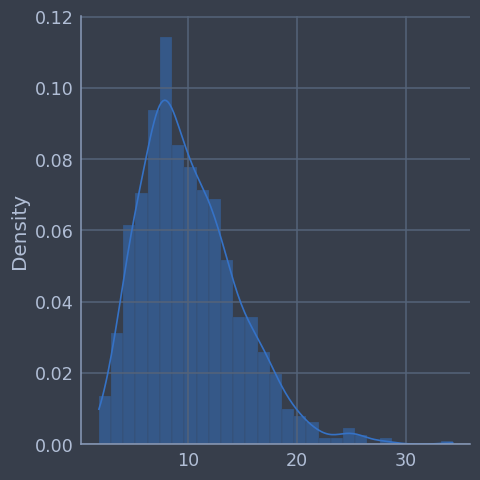

In [369]:
rrrrrr = scipy.stats.chi2.rvs(parameter, size=sample_size)
sns.displot(data=rrrrrr, kde=True, stat="density")
sns.displot(data=one_sample, kde=True, stat="density")

In [29]:
# Generate samples from a _____ distribution

samples = np.random.exponential(distribution_range, (num_samples, sample_size))

# Calculate the sample means
sample_means = np.mean(samples, axis=1)

# Plot the histogram of the sample means
# plt.hist(sample_means, bins=30, density=True, edgecolor='black')
# plt.title('Histogram of Sample Means')
# plt.xlabel('Sample Mean')
# plt.ylabel('Density')
# plt.show()

TypeError: 'list' object cannot be interpreted as an integer

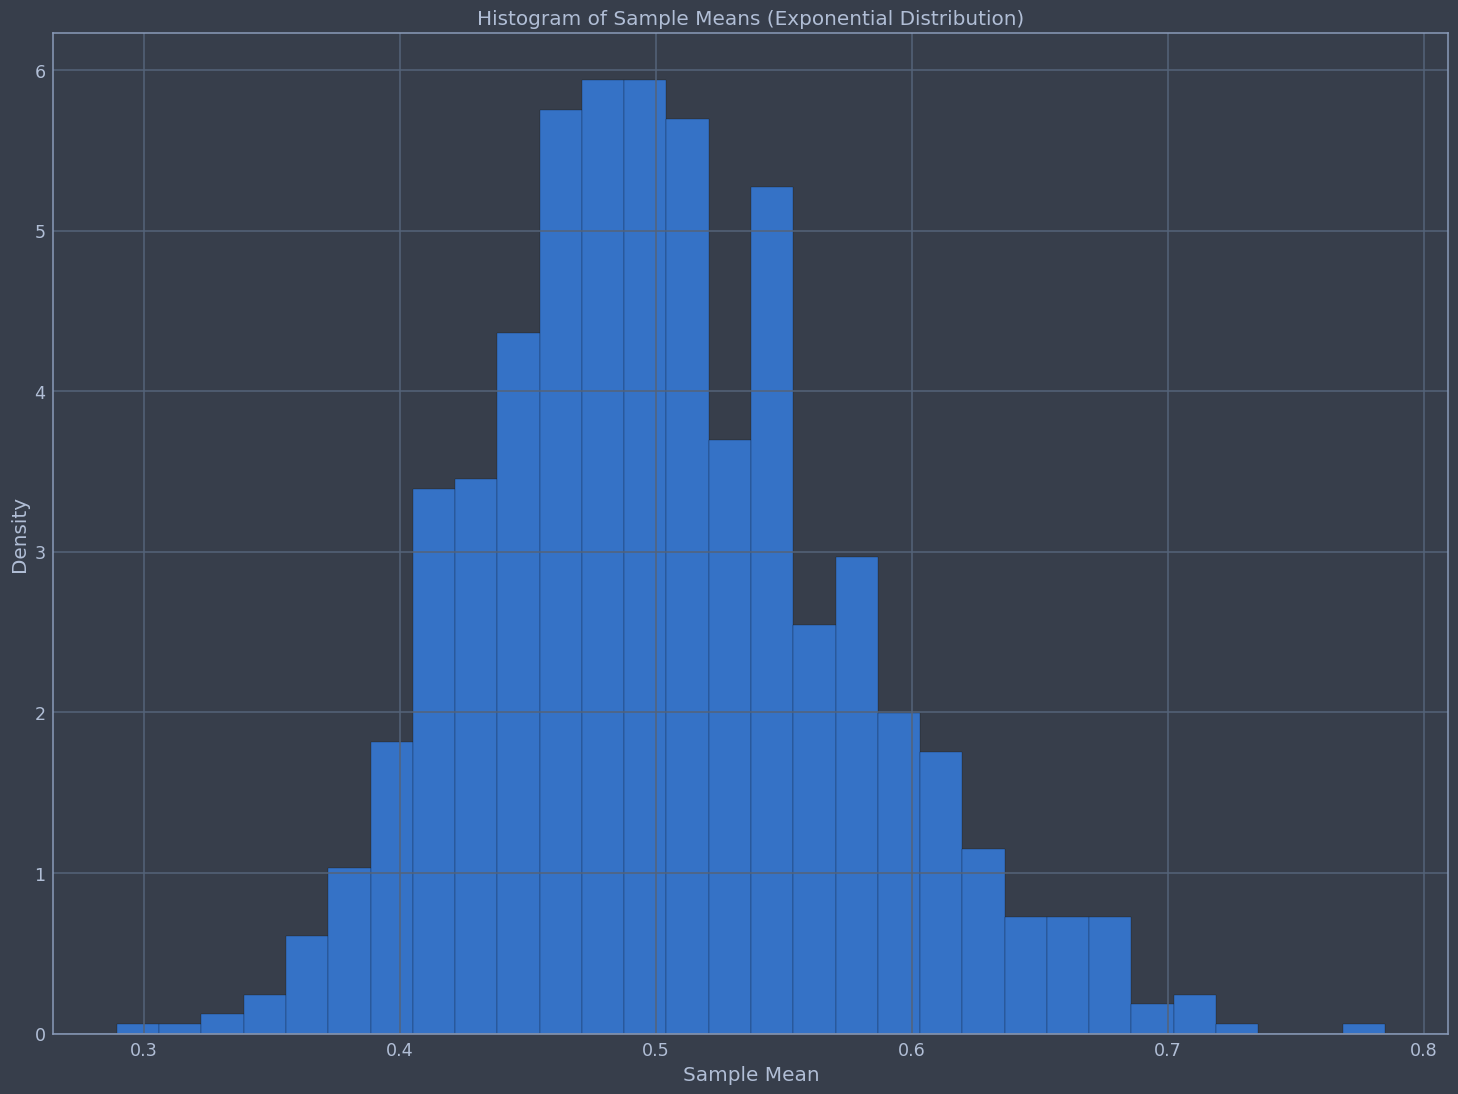

In [26]:
# Set the parameters
num_samples = 1000
sample_size = 50
lambda_param = 2

# Generate samples from an exponential distribution
samples = np.random.exponential(scale=1/lambda_param, size=(num_samples, sample_size))

# Calculate the sample means
sample_means = np.mean(samples, axis=1)

# Plot the histogram of the sample means
plt.hist(sample_means, bins=30, density=True, edgecolor='black')
plt.title('Histogram of Sample Means (Exponential Distribution)')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.show()

In [30]:
# Set the parameters
num_samples = 10000
sample_size = 50

# Gamma distribution parameters
gamma_shape = 2
gamma_scale = 1

# Calculate the theoretical mean and variance
theoretical_mean = gamma_shape * gamma_scale
theoretical_variance = (gamma_shape * gamma_scale ** 2)

# Generate samples from the Gamma distribution
samples = np.random.gamma(shape=gamma_shape, scale=gamma_scale, size=(num_samples, sample_size))

# Calculate the sample means
sample_means = np.mean(samples, axis=1)

# Calculate the empirical mean and variance of the sample means
empirical_mean = np.mean(sample_means)
empirical_variance = np.var(sample_means)

# Compare the theoretical and empirical values
print(f"Theoretical mean: {theoretical_mean:.4f}")
print(f"Empirical mean: {empirical_mean:.4f}")
print(f"\n")
print(f"Theoretical variance: {theoretical_variance:.4f}")
print(f"Empirical variance: {empirical_variance:.4f}")

Theoretical mean: 2.0000
Empirical mean: 2.0000


Theoretical variance: 2.0000
Empirical variance: 0.0402


In [31]:
# Set the parameters
population_size = 100000
sample_size = 50
num_samples = 100

# Generate a random representative sample of salaries (in thousands)
# You should replace this with actual collected salary data
np.random.seed(42)  # Setting a seed for reproducibility
population_salaries = np.random.lognormal(mean=4.5, sigma=0.8, size=population_size)

# Generate multiple samples and calculate the sample means and standard deviations
sample_means = []
sample_std_devs = []

for _ in range(num_samples):
  sample_salaries = np.random.choice(population_salaries, size=sample_size)
  sample_means.append(np.mean(sample_salaries))
  sample_std_devs.append(np.std(sample_salaries))

# Calculate the average of the sample means and the standard error
average_sample_means = np.mean(sample_means)
standard_error = np.std(sample_means) / np.sqrt(num_samples)

# Calculate the 95% confidence interval
margin_of_error = 1.96 * standard_error
lower_limit = average_sample_means - margin_of_error
upper_limit = average_sample_means + margin_of_error

# Report the results
print(f"Estimated average salary (in thousands): {average_sample_means:.2f}")
print(f"95% confidence interval (in thousands): ({lower_limit:.2f}, {upper_limit:.2f})")

Estimated average salary (in thousands): 124.74
95% confidence interval (in thousands): (121.23, 128.26)


# Интересное

https://stackoverflow.com/questions/71626841/annotating-adding-the-values-to-figure-plot-on-seaborn-line-and-bar-charts-co

In [41]:
import string


def solution(a_string: str) -> bool:
    a_string = "".join(l for l in a_string if l not in string.punctuation)
    a_string = "".join(a_string.split())
    return a_string.lower() == a_string.strip(string.punctuation).lower()[::-1]

In [43]:
solution(input())

 то, по, т


True

In [8]:
"то, по, т".strip(string.punctuation)

'то, по, т'

In [40]:
sentense = "  то, по, т   "

sentense

'топот'